<a href="https://colab.research.google.com/github/OmidGhadami95/Caregivers/blob/main/Caregivers_Demographic_Features_V9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

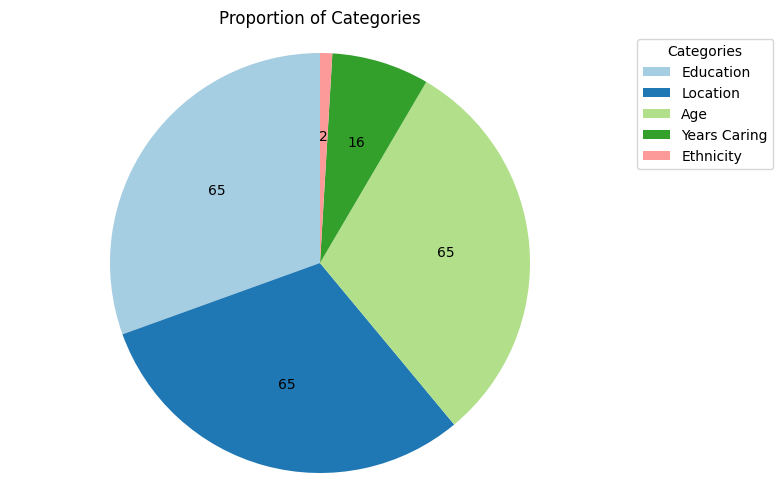

In [ ]:
import matplotlib.pyplot as plt

# Data for the new pie chart
sizes = [65, 65, 65, 16, 2]
labels = ['Education', 'Location', 'Age', 'Years Caring', 'Ethnicity']
colors = plt.cm.Paired.colors[:5]  # Select colors from the 'Paired' colormap

# Create a function to display the actual numbers
def func(pct, allsizes):
    absolute = int(pct / 100. * sum(allsizes))  # Calculate the actual number
    return f"{absolute}"  # Return the number

# Create a pie chart without labels
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(sizes, autopct=lambda pct: func(pct, sizes), startangle=90, colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Title for the pie chart
ax.set_title("Proportion of Categories")

# Create a custom legend
ax.legend(labels, title="Categories", loc="upper left", bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()


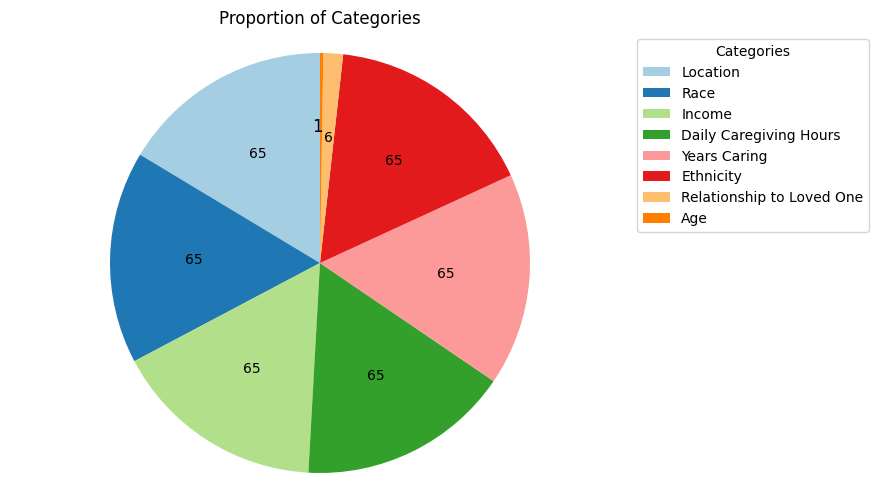

In [ ]:
import matplotlib.pyplot as plt


sizes = [65, 65, 65, 65, 65, 65, 6, 1]
labels = ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Relationship to Loved One', 'Age']
colors = plt.cm.Paired.colors[:8]


def func(pct, allsizes):
    absolute = int(pct / 100. * sum(allsizes))
    return f"{absolute}"


fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(sizes, autopct=lambda pct: func(pct, sizes), startangle=90, colors=colors)


ax.axis('equal')


autotexts[7].set_text(f"{sizes[7]}")


autotexts[7].set_position((-0.01, 0.65))
autotexts[7].set_fontsize(12)


ax.set_title("Proportion of Categories")


ax.legend(labels, title="Categories", loc="upper left", bbox_to_anchor=(1, 1))


plt.show()


Chi-square with p-value without excluding infrequent

*********************

****************************************************

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from collections import Counter

In [2]:
# Load the CSV file
data = pd.read_csv("Caregivers_survey.csv")

# Remove the 17th row (index 16)
data = data.drop(index=16).reset_index(drop=True)

# Remove rows with 'Participant ID' values of 68 and 69
data = data[~data['Participant ID'].isin([69, 70])]

# Save the modified data to a new CSV file
data.to_csv("Modified_Caregivers_survey.csv", index=False)

List of the remaining Participant IDs

In [3]:
# Read the CSV file
df = pd.read_csv('Modified_Caregivers_survey.csv')

# Create a list of all values in the 'Participant ID' column
participant_ids = df['Participant ID'].tolist()

# Print the list
print(participant_ids)

number_of_participants_demo = len(participant_ids)
print(f"The list contains {number_of_participants_demo} participant IDs.")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]
The list contains 67 participant IDs.


Load the all_participant_data.csv and remove the empty rows and create a list of Paticipant IDs

In [9]:
# Read the CSV file
df = pd.read_csv('all_participant_data.csv')

# Create a list of all values in the 'Participant ID' column
participant_ids = df['Participant ID'].tolist()

# Print the list
print(participant_ids)

number_of_participants_narrative = len(participant_ids)
print(f"The list contains {number_of_participants_narrative} participant IDs.")

[23, 7, 51, 45, 3, 61, 34, 22, 40, 54, 55, 59, 64, 13, 33, 21, 26, 44, 62, 43, 19, 10, 35, 37, 8, 66, 58, 1, 31, 48, 24, 16, 41, 29, 57, 4, 2, 27, 9, 5, 14, 18, 68, 25, 65, 63, 46, 56, 11, 20, 6, 53, 15, 42, 50, 30, 49, 38, 36, 32, 60, 47, 52, 67, 12]
The list contains 65 participant IDs.


Which participants are in the first list which are not in the second list? We should remove them from the first list!

In [10]:
# Read the first CSV file and extract participant IDs
df1 = pd.read_csv('Modified_Caregivers_survey.csv')
participant_ids_demo = df1['Participant ID'].tolist()

# Read the second CSV file and extract participant IDs
df2 = pd.read_csv('all_participant_data.csv')
participant_ids_narrative = df2['Participant ID'].tolist()

# Find the values in the first list but not in the second list
difference_demo = set(participant_ids_demo) - set(participant_ids_narrative)
print(f"Participants in the first list but not in the second list: {difference_demo}")

# Find the number of unique items in the difference
print(f"Number of participants in the first list but not in the second list: {len(difference_demo)}")

Participants in the first list but not in the second list: {28, 39}
Number of participants in the first list but not in the second list: 2


Remove participant 28 and 39 from the Caregivers_survey.csv

In [11]:
# Load the CSV file
data = pd.read_csv("Modified_Caregivers_survey.csv")

# Remove rows with 'Participant ID' values of 68 and 69
data = data[~data['Participant ID'].isin([28, 39])]

# Save the modified data to a new CSV file
data.to_csv("Modified_Caregivers_survey.csv", index=False)

# Read the CSV file
df = pd.read_csv('Modified_Caregivers_survey.csv')

# Create a list of all values in the 'Participant ID' column
participant_ids = df['Participant ID'].tolist()

# Print the list
print(participant_ids)

number_of_participants_demo = len(participant_ids)
print(f"The list contains {number_of_participants_demo} participant IDs.")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]
The list contains 65 participant IDs.


Find and fill the empty records

In [12]:
# Load the CSV file
data = pd.read_csv("Modified_Caregivers_survey.csv")

# Count empty records in the dataset
empty_records = data.isnull().sum().sum()

print(f"Total number of empty records: {empty_records}")

Total number of empty records: 6


Majority value for null values in 'Geographic Location' column

In [13]:
# Remove leading/trailing spaces in column names
data.columns = data.columns.str.strip()

# Now attempt to fill null values in 'Geographic Location'
if 'Geographic Location' in data.columns and data['Geographic Location'].isnull().any():
    majority_value = data['Geographic Location'].mode().iloc[0]
    data['Geographic Location'].fillna(majority_value, inplace=True)

# Save the modified dataset
data.to_csv("Modified_Caregivers_survey.csv", index=False)

print("Null records in 'Geographic Location' column have been filled with the majority value.")

Null records in 'Geographic Location' column have been filled with the majority value.


/tmp/ipython-input-2639762867.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Geographic Location'].fillna(majority_value, inplace=True)


In [14]:
# Load the CSV file
data = pd.read_csv("Modified_Caregivers_survey.csv")

# Count empty records in the dataset
empty_records = data.isnull().sum().sum()

print(f"Total number of empty records: {empty_records}")

Total number of empty records: 5


'Unknown' value for null values in other columns

In [15]:
# Load the CSV file
data = pd.read_csv("Modified_Caregivers_survey.csv")

# Identify columns with null records
null_columns = data.columns[data.isnull().any()]

# Fill null records with 'Unknown' in each column
for column in null_columns:
    data[column].fillna('Unknown', inplace=True)

# Save the modified dataset to a new CSV file
data.to_csv("Modified_Caregivers_survey.csv", index=False)

print("Null records have been filled with 'Unknown' and saved to 'Modified_Caregivers_survey.csv'.")


Null records have been filled with 'Unknown' and saved to 'Modified_Caregivers_survey.csv'.


/tmp/ipython-input-3749670875.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna('Unknown', inplace=True)


In [16]:
# Load the CSV file
data = pd.read_csv("Modified_Caregivers_survey.csv")

# Count empty records in the dataset
empty_records = data.isnull().sum().sum()

print(f"Total number of empty records: {empty_records}")

Total number of empty records: 0


In [17]:
# Read the CSV file
df = pd.read_csv('Modified_Caregivers_survey.csv')

# Replace the values in the 'Ethnicity' column
df['Ethnicity'] = df['Ethnicity'].replace('Unknown', 'Unknown / Not Reported')

# Save the modified DataFrame back to CSV
df.to_csv('Modified_Caregivers_survey.csv', index=False)

Change score column names

In [18]:
# Read the CSV file
df = pd.read_csv('Modified_Caregivers_survey.csv')

# Rename the 22nd and last columns
df.rename(columns={df.columns[21]: 'PHQ_score', df.columns[-1]: 'ZBI_score'}, inplace=True)

# Save the modified DataFrame back to CSV
df.to_csv('Modified_Caregivers_survey.csv', index=False)

print(df.columns)
print("Column names updated successfully.")

Index(['Participant ID', 'Age', 'Sex Identified at Birth', 'Race', 'Ethnicity',
       'Geographic Location', 'Employment Status', 'Education Level',
       'Income Level', 'Health Insurance Coverage',
       'Relationship to the loved one with dementia',
       'Since how many years are you taking care of your loved one diagnosed with dementia?',
       'How many hours on average in a day do/did you care for your loved one with dementia?',
       'Little interest or pleasure in doing things',
       'Feeling down, depressed, or hopeless',
       'Trouble falling or staying asleep, or sleeping too much',
       'Feeling tired or having little energy', 'Poor appetite or overeating',
       'Feeling bad about yourself, or that you are a failure, or have let yourself or your family down',
       'Trouble concentrating on things, such as reading the newspaper or watching television',
       'Moving or speaking so slowly that other people could have noticed. Or the opposite--being so fidget

In [19]:
# Function to categorize ages
def categorize_age(age):
    if age =='18-24 years' or  age =='25-34 years':
        return '18-34'
    return '35 and Above'

# Apply the function to create a new column
df['Age_group'] = df['Age'].apply(categorize_age)

df.head()

,Participant ID,Age,Sex Identified at Birth,Race,Ethnicity,Geographic Location,Employment Status,Education Level,Income Level,Health Insurance Coverage,...,Do you feel strained when you are around your relative?,Do you feel that your health has suffered because of your involvement with your relative?,Do you feel that you don't have as much privacy as you would like because of your relative?,Do you feel that your social life has suffered because you are caring for your relative?,Do you feel that you have lost control of your life since your relative's illness?,Do you feel uncertain about what to do about your relative?,Do you feel you should be doing more for your relative?,Do you feel you could do a better job in caring for your relative?,ZBI_score,Age_group
0,1,18-24 years,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed part-time,Bachelor's degree,"$75,001 - $100,000",Yes,...,Nearly Always,Sometimes,Sometimes,Nearly Always,Sometimes,Sometimes,Quite Frequently,Sometimes,28.0,18-34
1,2,25-34 years,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed part-time,Bachelor's degree,"$25,000 - $50,000",Yes,...,Sometimes,Rarely,Rarely,Nearly Always,Rarely,Rarely,Never,Nearly Always,17.0,18-34
2,3,25-34 years,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed full-time,Bachelor's degree,"$25,000 - $50,000",No,...,Sometimes,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Quite Frequently,Quite Frequently,24.0,18-34
3,4,25-34 years,Male,Native Hawaiian or Other Pacific Islander,NOT Hispanic or Latino,Urban,Employed part-time,Bachelor's degree,"$75,001 - $100,000",Yes,...,Sometimes,Sometimes,Sometimes,Sometimes,Rarely,Quite Frequently,Sometimes,Quite Frequently,26.0,18-34
4,5,25-34 years,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed full-time,Master's degree,"$25,000 - $50,000",Yes,...,Sometimes,Sometimes,Quite Frequently,Quite Frequently,Sometimes,Quite Frequently,Quite Frequently,Quite Frequently,29.0,18-34


In [20]:
# Function to categorize ages
def race_cat(race):
    if race =='More Than One Race' or  race =='Native Hawaiian or Other Pacific Islander' or race=='Unknown':
        return 'Other'
    return race

# Apply the function to create a new column
df['Race_new'] = df['Race'].apply(race_cat)

df.head()

,Participant ID,Age,Sex Identified at Birth,Race,Ethnicity,Geographic Location,Employment Status,Education Level,Income Level,Health Insurance Coverage,...,Do you feel that your health has suffered because of your involvement with your relative?,Do you feel that you don't have as much privacy as you would like because of your relative?,Do you feel that your social life has suffered because you are caring for your relative?,Do you feel that you have lost control of your life since your relative's illness?,Do you feel uncertain about what to do about your relative?,Do you feel you should be doing more for your relative?,Do you feel you could do a better job in caring for your relative?,ZBI_score,Age_group,Race_new
0,1,18-24 years,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed part-time,Bachelor's degree,"$75,001 - $100,000",Yes,...,Sometimes,Sometimes,Nearly Always,Sometimes,Sometimes,Quite Frequently,Sometimes,28.0,18-34,Black or African American
1,2,25-34 years,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed part-time,Bachelor's degree,"$25,000 - $50,000",Yes,...,Rarely,Rarely,Nearly Always,Rarely,Rarely,Never,Nearly Always,17.0,18-34,Black or African American
2,3,25-34 years,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed full-time,Bachelor's degree,"$25,000 - $50,000",No,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Quite Frequently,Quite Frequently,24.0,18-34,Black or African American
3,4,25-34 years,Male,Native Hawaiian or Other Pacific Islander,NOT Hispanic or Latino,Urban,Employed part-time,Bachelor's degree,"$75,001 - $100,000",Yes,...,Sometimes,Sometimes,Sometimes,Rarely,Quite Frequently,Sometimes,Quite Frequently,26.0,18-34,Other
4,5,25-34 years,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed full-time,Master's degree,"$25,000 - $50,000",Yes,...,Sometimes,Quite Frequently,Quite Frequently,Sometimes,Quite Frequently,Quite Frequently,Quite Frequently,29.0,18-34,Black or African American


In [21]:
# Function to categorize ages
def emp_cat(Employment):
    if Employment =='Student' or  Employment =='Homemaker' or Employment=='Other':
        return 'Other'
    return Employment

# Apply the function to create a new column
df['Employment_new'] = df['Employment Status'].apply(emp_cat)

df.head()

,Participant ID,Age,Sex Identified at Birth,Race,Ethnicity,Geographic Location,Employment Status,Education Level,Income Level,Health Insurance Coverage,...,Do you feel that you don't have as much privacy as you would like because of your relative?,Do you feel that your social life has suffered because you are caring for your relative?,Do you feel that you have lost control of your life since your relative's illness?,Do you feel uncertain about what to do about your relative?,Do you feel you should be doing more for your relative?,Do you feel you could do a better job in caring for your relative?,ZBI_score,Age_group,Race_new,Employment_new
0,1,18-24 years,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed part-time,Bachelor's degree,"$75,001 - $100,000",Yes,...,Sometimes,Nearly Always,Sometimes,Sometimes,Quite Frequently,Sometimes,28.0,18-34,Black or African American,Employed part-time
1,2,25-34 years,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed part-time,Bachelor's degree,"$25,000 - $50,000",Yes,...,Rarely,Nearly Always,Rarely,Rarely,Never,Nearly Always,17.0,18-34,Black or African American,Employed part-time
2,3,25-34 years,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed full-time,Bachelor's degree,"$25,000 - $50,000",No,...,Sometimes,Sometimes,Rarely,Rarely,Quite Frequently,Quite Frequently,24.0,18-34,Black or African American,Employed full-time
3,4,25-34 years,Male,Native Hawaiian or Other Pacific Islander,NOT Hispanic or Latino,Urban,Employed part-time,Bachelor's degree,"$75,001 - $100,000",Yes,...,Sometimes,Sometimes,Rarely,Quite Frequently,Sometimes,Quite Frequently,26.0,18-34,Other,Employed part-time
4,5,25-34 years,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed full-time,Master's degree,"$25,000 - $50,000",Yes,...,Quite Frequently,Quite Frequently,Sometimes,Quite Frequently,Quite Frequently,Quite Frequently,29.0,18-34,Black or African American,Employed full-time


In [22]:
# Function to categorize ages
def edu_cat(Education):
    if Education =='High school graduate' or  Education =='Some college/technical school' :
        return 'No Bachelors Degree'
    return 'Bachelors or Above'

# Apply the function to create a new column
df['Education_new'] = df['Education Level'].apply(edu_cat)

df.head()

,Participant ID,Age,Sex Identified at Birth,Race,Ethnicity,Geographic Location,Employment Status,Education Level,Income Level,Health Insurance Coverage,...,Do you feel that your social life has suffered because you are caring for your relative?,Do you feel that you have lost control of your life since your relative's illness?,Do you feel uncertain about what to do about your relative?,Do you feel you should be doing more for your relative?,Do you feel you could do a better job in caring for your relative?,ZBI_score,Age_group,Race_new,Employment_new,Education_new
0,1,18-24 years,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed part-time,Bachelor's degree,"$75,001 - $100,000",Yes,...,Nearly Always,Sometimes,Sometimes,Quite Frequently,Sometimes,28.0,18-34,Black or African American,Employed part-time,Bachelors or Above
1,2,25-34 years,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed part-time,Bachelor's degree,"$25,000 - $50,000",Yes,...,Nearly Always,Rarely,Rarely,Never,Nearly Always,17.0,18-34,Black or African American,Employed part-time,Bachelors or Above
2,3,25-34 years,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed full-time,Bachelor's degree,"$25,000 - $50,000",No,...,Sometimes,Rarely,Rarely,Quite Frequently,Quite Frequently,24.0,18-34,Black or African American,Employed full-time,Bachelors or Above
3,4,25-34 years,Male,Native Hawaiian or Other Pacific Islander,NOT Hispanic or Latino,Urban,Employed part-time,Bachelor's degree,"$75,001 - $100,000",Yes,...,Sometimes,Rarely,Quite Frequently,Sometimes,Quite Frequently,26.0,18-34,Other,Employed part-time,Bachelors or Above
4,5,25-34 years,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed full-time,Master's degree,"$25,000 - $50,000",Yes,...,Quite Frequently,Sometimes,Quite Frequently,Quite Frequently,Quite Frequently,29.0,18-34,Black or African American,Employed full-time,Bachelors or Above


In [23]:
# Function to categorize ages
def care_cat(care):
    if care =='9-12 hours' or  care =='More than 12 hours' :
        return 'More than 9 hours'
    return care

# Apply the function to create a new column
df['care hours_new'] = df['How many hours on average in a day do/did you care for your loved one with dementia?'].apply(care_cat)

df.head()

,Participant ID,Age,Sex Identified at Birth,Race,Ethnicity,Geographic Location,Employment Status,Education Level,Income Level,Health Insurance Coverage,...,Do you feel that you have lost control of your life since your relative's illness?,Do you feel uncertain about what to do about your relative?,Do you feel you should be doing more for your relative?,Do you feel you could do a better job in caring for your relative?,ZBI_score,Age_group,Race_new,Employment_new,Education_new,care hours_new
0,1,18-24 years,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed part-time,Bachelor's degree,"$75,001 - $100,000",Yes,...,Sometimes,Sometimes,Quite Frequently,Sometimes,28.0,18-34,Black or African American,Employed part-time,Bachelors or Above,5-8 hours
1,2,25-34 years,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed part-time,Bachelor's degree,"$25,000 - $50,000",Yes,...,Rarely,Rarely,Never,Nearly Always,17.0,18-34,Black or African American,Employed part-time,Bachelors or Above,More than 9 hours
2,3,25-34 years,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed full-time,Bachelor's degree,"$25,000 - $50,000",No,...,Rarely,Rarely,Quite Frequently,Quite Frequently,24.0,18-34,Black or African American,Employed full-time,Bachelors or Above,More than 9 hours
3,4,25-34 years,Male,Native Hawaiian or Other Pacific Islander,NOT Hispanic or Latino,Urban,Employed part-time,Bachelor's degree,"$75,001 - $100,000",Yes,...,Rarely,Quite Frequently,Sometimes,Quite Frequently,26.0,18-34,Other,Employed part-time,Bachelors or Above,5-8 hours
4,5,25-34 years,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed full-time,Master's degree,"$25,000 - $50,000",Yes,...,Sometimes,Quite Frequently,Quite Frequently,Quite Frequently,29.0,18-34,Black or African American,Employed full-time,Bachelors or Above,5-8 hours


Droping extra columns

In [24]:
# List of columns you want to keep
columns_to_keep = ['Participant ID', 'Age_group', 'Sex Identified at Birth', 'Race_new', 'Ethnicity', 'Geographic Location', 'Employment_new', 'Education_new',
                   'Income Level', 'Health Insurance Coverage', 'Relationship to the loved one with dementia', 'Since how many years are you taking care of your loved one diagnosed with dementia?',
                   'care hours_new', 'PHQ_score', 'ZBI_score']

# Keep only the specified columns
df = df[columns_to_keep]

# Save the result to a new CSV file
df.to_csv('Manipulated.csv', index=False)
df.head()
data.to_csv("preprocessed_demographic.csv", index=False)

In [25]:
# Define new column names (modify these according to your needs)
new_column_names = [
    'Participant ID',
    'Age',
    'Sex',
    'Race',
    'Ethnicity',
    'Location',
    'Employment',
    'Education',
    'Income',
    'Health Insurance',
    'Relationship to Loved One',
    'Years Caring',
    'Daily Caregiving Hours',
    'PHQ_score',
    'ZBI_score'
]

# Rename the columns
df.columns = new_column_names

# Save to the same CSV file (overwriting the previous version)
df.to_csv('Manipulated.csv', index=False)
df.head()

,Participant ID,Age,Sex,Race,Ethnicity,Location,Employment,Education,Income,Health Insurance,Relationship to Loved One,Years Caring,Daily Caregiving Hours,PHQ_score,ZBI_score
0,1,18-34,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed part-time,Bachelors or Above,"$75,001 - $100,000",Yes,Parent,1-2 years,5-8 hours,8.0,28.0
1,2,18-34,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed part-time,Bachelors or Above,"$25,000 - $50,000",Yes,Parent,6 years and more,More than 9 hours,15.0,17.0
2,3,18-34,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed full-time,Bachelors or Above,"$25,000 - $50,000",No,Parent,3-5 years,More than 9 hours,2.0,24.0
3,4,18-34,Male,Other,NOT Hispanic or Latino,Urban,Employed part-time,Bachelors or Above,"$75,001 - $100,000",Yes,Other family member,3-5 years,5-8 hours,11.0,26.0
4,5,18-34,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed full-time,Bachelors or Above,"$25,000 - $50,000",Yes,Other family member,3-5 years,5-8 hours,21.0,29.0


Seperate CSVs

In [26]:
# Load the CSV file
data = pd.read_csv('Manipulated.csv')

# Create the first DataFrame without the 'ZBI_score' column
phq_preprocessed = data.drop(columns=['ZBI_score'])

# Create the second DataFrame without the 'PHQ_score' column
zbi_preprocessed = data.drop(columns=['PHQ_score'])

# Save the DataFrames to CSV files
phq_preprocessed.to_csv('PHQ_preprocessed.csv', index=False)
zbi_preprocessed.to_csv('ZBI_preprocessed.csv', index=False)

In [27]:
phq_preprocessed.head()

,Participant ID,Age,Sex,Race,Ethnicity,Location,Employment,Education,Income,Health Insurance,Relationship to Loved One,Years Caring,Daily Caregiving Hours,PHQ_score
0,1,18-34,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed part-time,Bachelors or Above,"$75,001 - $100,000",Yes,Parent,1-2 years,5-8 hours,8.0
1,2,18-34,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed part-time,Bachelors or Above,"$25,000 - $50,000",Yes,Parent,6 years and more,More than 9 hours,15.0
2,3,18-34,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed full-time,Bachelors or Above,"$25,000 - $50,000",No,Parent,3-5 years,More than 9 hours,2.0
3,4,18-34,Male,Other,NOT Hispanic or Latino,Urban,Employed part-time,Bachelors or Above,"$75,001 - $100,000",Yes,Other family member,3-5 years,5-8 hours,11.0
4,5,18-34,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed full-time,Bachelors or Above,"$25,000 - $50,000",Yes,Other family member,3-5 years,5-8 hours,21.0


In [28]:
zbi_preprocessed.head()

,Participant ID,Age,Sex,Race,Ethnicity,Location,Employment,Education,Income,Health Insurance,Relationship to Loved One,Years Caring,Daily Caregiving Hours,ZBI_score
0,1,18-34,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed part-time,Bachelors or Above,"$75,001 - $100,000",Yes,Parent,1-2 years,5-8 hours,28.0
1,2,18-34,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed part-time,Bachelors or Above,"$25,000 - $50,000",Yes,Parent,6 years and more,More than 9 hours,17.0
2,3,18-34,Male,Black or African American,NOT Hispanic or Latino,Urban,Employed full-time,Bachelors or Above,"$25,000 - $50,000",No,Parent,3-5 years,More than 9 hours,24.0
3,4,18-34,Male,Other,NOT Hispanic or Latino,Urban,Employed part-time,Bachelors or Above,"$75,001 - $100,000",Yes,Other family member,3-5 years,5-8 hours,26.0
4,5,18-34,Male,Black or African American,NOT Hispanic or Latino,Suburban,Employed full-time,Bachelors or Above,"$25,000 - $50,000",Yes,Other family member,3-5 years,5-8 hours,29.0


In [29]:
# Load the CSV file
data = pd.read_csv('PHQ_preprocessed.csv')

# Update the PHQ_score column
data['PHQ_score'] = (data['PHQ_score'] >= 10).astype(int)

# Save the updated DataFrame back to CSV
data.to_csv('PHQ_preprocessed.csv', index=False)

print("CSV file has been updated successfully.")

# Load the CSV file
data = pd.read_csv('ZBI_preprocessed.csv')

# Update the ZBI_score column
data['ZBI_score'] = (data['ZBI_score'] >= 20).astype(int)

# Save the updated DataFrame back to CSV
data.to_csv('ZBI_preprocessed.csv', index=False)

print("CSV file has been updated successfully.")

CSV file has been updated successfully.
CSV file has been updated successfully.


Binary Encoding

In [30]:
pip install category-encoders

In [31]:
# Load your CSV file
df = pd.read_csv("/content/PHQ_preprocessed.csv")

# Select the categorical columns (2nd to 13th columns)
columns_to_encode = df.columns[1:13]  # Indexing starts from 0

# Assign fixed binary codes (like 00, 01, 10, 11)
unique_mappings = {}  # Dictionary to store category-to-binary mappings

for col in columns_to_encode:
    unique_values = df[col].unique()
    num_bits = len(bin(len(unique_values) - 1)[2:])  # Number of bits needed
    binary_codes = [format(i, f'0{num_bits}b') for i in range(len(unique_values))]
    mapping = dict(zip(unique_values, binary_codes))  # Map categories to binary
    unique_mappings[col] = mapping
    df[col] = df[col].map(mapping).astype(str)  # Replace values with binary codes

# Print the mappings for reference
print("\nCategory-to-Binary Mappings:")
for col, mapping in unique_mappings.items():
    print(f"{col}: {mapping}")

# Save the transformed dataframe to a new CSV file
df.to_csv("/content/PHQ_preprocessed.csv", index=False)

print("Encoded CSV file saved successfully as '/content/PHQ_preprocessed.csv'.")

# Display the transformed dataframe
df.head()



Category-to-Binary Mappings:
Age: {'18-34': '0', '35 and Above': '1'}
Sex: {'Male': '0', 'Female': '1'}
Race: {'Black or African American': '00', 'Other': '01', 'White': '10'}
Ethnicity: {'NOT Hispanic or Latino': '00', 'Unknown / Not Reported': '01', 'Hispanic or Latino': '10'}
Location: {'Urban': '00', 'Suburban': '01', 'Rural': '10'}
Employment: {'Employed part-time': '00', 'Employed full-time': '01', 'Other': '10'}
Education: {'Bachelors or Above': '0', 'No Bachelors Degree': '1'}
Income: {'$75,001 - $100,000': '000', '$25,000 - $50,000': '001', '$50,001 - $75,000': '010', 'Under $25,000': '011', 'Over $100,000': '100', 'Unknown': '101'}
Health Insurance: {'Yes': '00', 'No': '01', 'Not sure': '10'}
Relationship to Loved One: {'Parent': '00', 'Other family member': '01', 'Sibling': '10', 'Spouse/Partner': '11'}
Years Caring: {'1-2 years': '00', '6 years and more': '01', '3-5 years': '10'}
Daily Caregiving Hours: {'5-8 hours': '00', 'More than 9 hours': '01', '2-4 hours': '10'}
Enco

,Participant ID,Age,Sex,Race,Ethnicity,Location,Employment,Education,Income,Health Insurance,Relationship to Loved One,Years Caring,Daily Caregiving Hours,PHQ_score
0,1,0,0,00,00,00,00,0,000,00,00,00,00,0
1,2,0,0,00,00,01,00,0,001,00,00,01,01,1
2,3,0,0,00,00,00,01,0,001,01,00,10,01,0
3,4,0,0,01,00,00,00,0,000,00,01,10,00,1
4,5,0,0,00,00,01,01,0,001,00,01,10,00,1


In [32]:
# Load your CSV file
df = pd.read_csv("/content/ZBI_preprocessed.csv")

# Select the categorical columns (2nd to 13th columns)
columns_to_encode = df.columns[1:13]  # Indexing starts from 0

# Assign fixed binary codes (like 00, 01, 10, 11)
unique_mappings = {}  # Dictionary to store category-to-binary mappings

for col in columns_to_encode:
    unique_values = df[col].unique()
    num_bits = len(bin(len(unique_values) - 1)[2:])  # Number of bits needed
    binary_codes = [format(i, f'0{num_bits}b') for i in range(len(unique_values))]
    mapping = dict(zip(unique_values, binary_codes))  # Map categories to binary
    unique_mappings[col] = mapping
    df[col] = df[col].map(mapping).astype(str)  # Replace values with binary codes

# Print the mappings for reference
print("\nCategory-to-Binary Mappings:")
for col, mapping in unique_mappings.items():
    print(f"{col}: {mapping}")

# Save the transformed dataframe to a new CSV file
df.to_csv("/content/ZBI_preprocessed.csv", index=False)

print("Encoded CSV file saved successfully as '/content/ZBI_preprocessed.csv'.")

# Display the transformed dataframe
df.head()



Category-to-Binary Mappings:
Age: {'18-34': '0', '35 and Above': '1'}
Sex: {'Male': '0', 'Female': '1'}
Race: {'Black or African American': '00', 'Other': '01', 'White': '10'}
Ethnicity: {'NOT Hispanic or Latino': '00', 'Unknown / Not Reported': '01', 'Hispanic or Latino': '10'}
Location: {'Urban': '00', 'Suburban': '01', 'Rural': '10'}
Employment: {'Employed part-time': '00', 'Employed full-time': '01', 'Other': '10'}
Education: {'Bachelors or Above': '0', 'No Bachelors Degree': '1'}
Income: {'$75,001 - $100,000': '000', '$25,000 - $50,000': '001', '$50,001 - $75,000': '010', 'Under $25,000': '011', 'Over $100,000': '100', 'Unknown': '101'}
Health Insurance: {'Yes': '00', 'No': '01', 'Not sure': '10'}
Relationship to Loved One: {'Parent': '00', 'Other family member': '01', 'Sibling': '10', 'Spouse/Partner': '11'}
Years Caring: {'1-2 years': '00', '6 years and more': '01', '3-5 years': '10'}
Daily Caregiving Hours: {'5-8 hours': '00', 'More than 9 hours': '01', '2-4 hours': '10'}
Enco

,Participant ID,Age,Sex,Race,Ethnicity,Location,Employment,Education,Income,Health Insurance,Relationship to Loved One,Years Caring,Daily Caregiving Hours,ZBI_score
0,1,0,0,00,00,00,00,0,000,00,00,00,00,1
1,2,0,0,00,00,01,00,0,001,00,00,01,01,0
2,3,0,0,00,00,00,01,0,001,01,00,10,01,1
3,4,0,0,01,00,00,00,0,000,00,01,10,00,1
4,5,0,0,00,00,01,01,0,001,00,01,10,00,1


We initially excluded features with fewer than five samples per target variable.

مشکلی که اینجا داریم:
bazi az feature ha masalan 4 ta value bishtar nadaran vali 3 ta digit daran!

باید اعداد فراوانی هر کتگوری رو بررسی کنم که ببینم درست کد کار کرده یا نه

In [33]:
# Read CSV with dtype specification to preserve leading zeros
df = pd.read_csv('/content/PHQ_preprocessed.csv', dtype={col: str for col in df.columns[1:13]})

# Process columns 2 to 13 (indexes 1 to 12)
for col in df.columns[1:13]:
    # Convert to string to preserve formats
    df[col] = df[col].astype(str)

    # Get value counts
    value_counts = df[col].value_counts()

    # Identify values with <5 occurrences
    infrequent = value_counts[value_counts < 5].index.tolist()

    # Find most frequent value (as string)
    most_freq = df[col].mode()[0]

    # Replace only if needed
    if infrequent:
        df[col] = df[col].apply(lambda x: most_freq if x in infrequent else x)

    # Restore original data type if needed
    # df[col] = df[col].astype(object)  # Alternative preservation method

# Save with preserved formats
df.to_csv('/content/PHQ_preprocessed.csv', index=False, encoding='utf-8-sig')

In [34]:
# Read CSV with dtype specification to preserve leading zeros
df = pd.read_csv('/content/ZBI_preprocessed.csv', dtype={col: str for col in df.columns[1:13]})

# Process columns 2 to 13 (indexes 1 to 12)
for col in df.columns[1:13]:
    # Convert to string to preserve formats
    df[col] = df[col].astype(str)

    # Get value counts
    value_counts = df[col].value_counts()

    # Identify values with <5 occurrences
    infrequent = value_counts[value_counts < 5].index.tolist()

    # Find most frequent value (as string)
    most_freq = df[col].mode()[0]

    # Replace only if needed
    if infrequent:
        df[col] = df[col].apply(lambda x: most_freq if x in infrequent else x)

    # Restore original data type if needed
    # df[col] = df[col].astype(object)  # Alternative preservation method

# Save with preserved formats
df.to_csv('/content/ZBI_preprocessed.csv', index=False, encoding='utf-8-sig')

Feature Selection (Chi-square function)

Best Features

In [35]:
def feature_selection(data, target_column, drop_columns):
    # Create a copy of the data to avoid modifying the original
    df = data.copy()

    # Encode categorical variables using LabelEncoder
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

    # Handle missing values by filling them with the mode of each column
    df.fillna(df.mode().iloc[0], inplace=True)

    # Separate features and target variable
    X = df.drop(columns=drop_columns + [target_column])
    y = df[target_column]

    # Perform Chi-square test
    chi2_scores, p_values = chi2(X, y)

    # Create results DataFrame
    chi2_results = pd.DataFrame({
        'Feature': X.columns,
        'Chi2 Score': chi2_scores,
        'P-Value': p_values
    })

    # Sort by p-value and filter significant features
    significant_features = chi2_results[chi2_results['P-Value'] < 0.1]\
                          .sort_values(by='P-Value', ascending=True)

    # Return all significant features
    return significant_features['Feature'].tolist(), chi2_results

In [36]:
!pip install shap
import shap
shap.initjs()

In [37]:
# Load the dataset
data = pd.read_csv('PHQ_preprocessed.csv')  # Update this path

# Save all column names to a list
all_columns = data.columns.tolist()

# Print all column names
print("Column names:", all_columns)


Column names: ['Participant ID', 'Age', 'Sex', 'Race', 'Ethnicity', 'Location', 'Employment', 'Education', 'Income', 'Health Insurance', 'Relationship to Loved One', 'Years Caring', 'Daily Caregiving Hours', 'PHQ_score']


Correlation Matrix

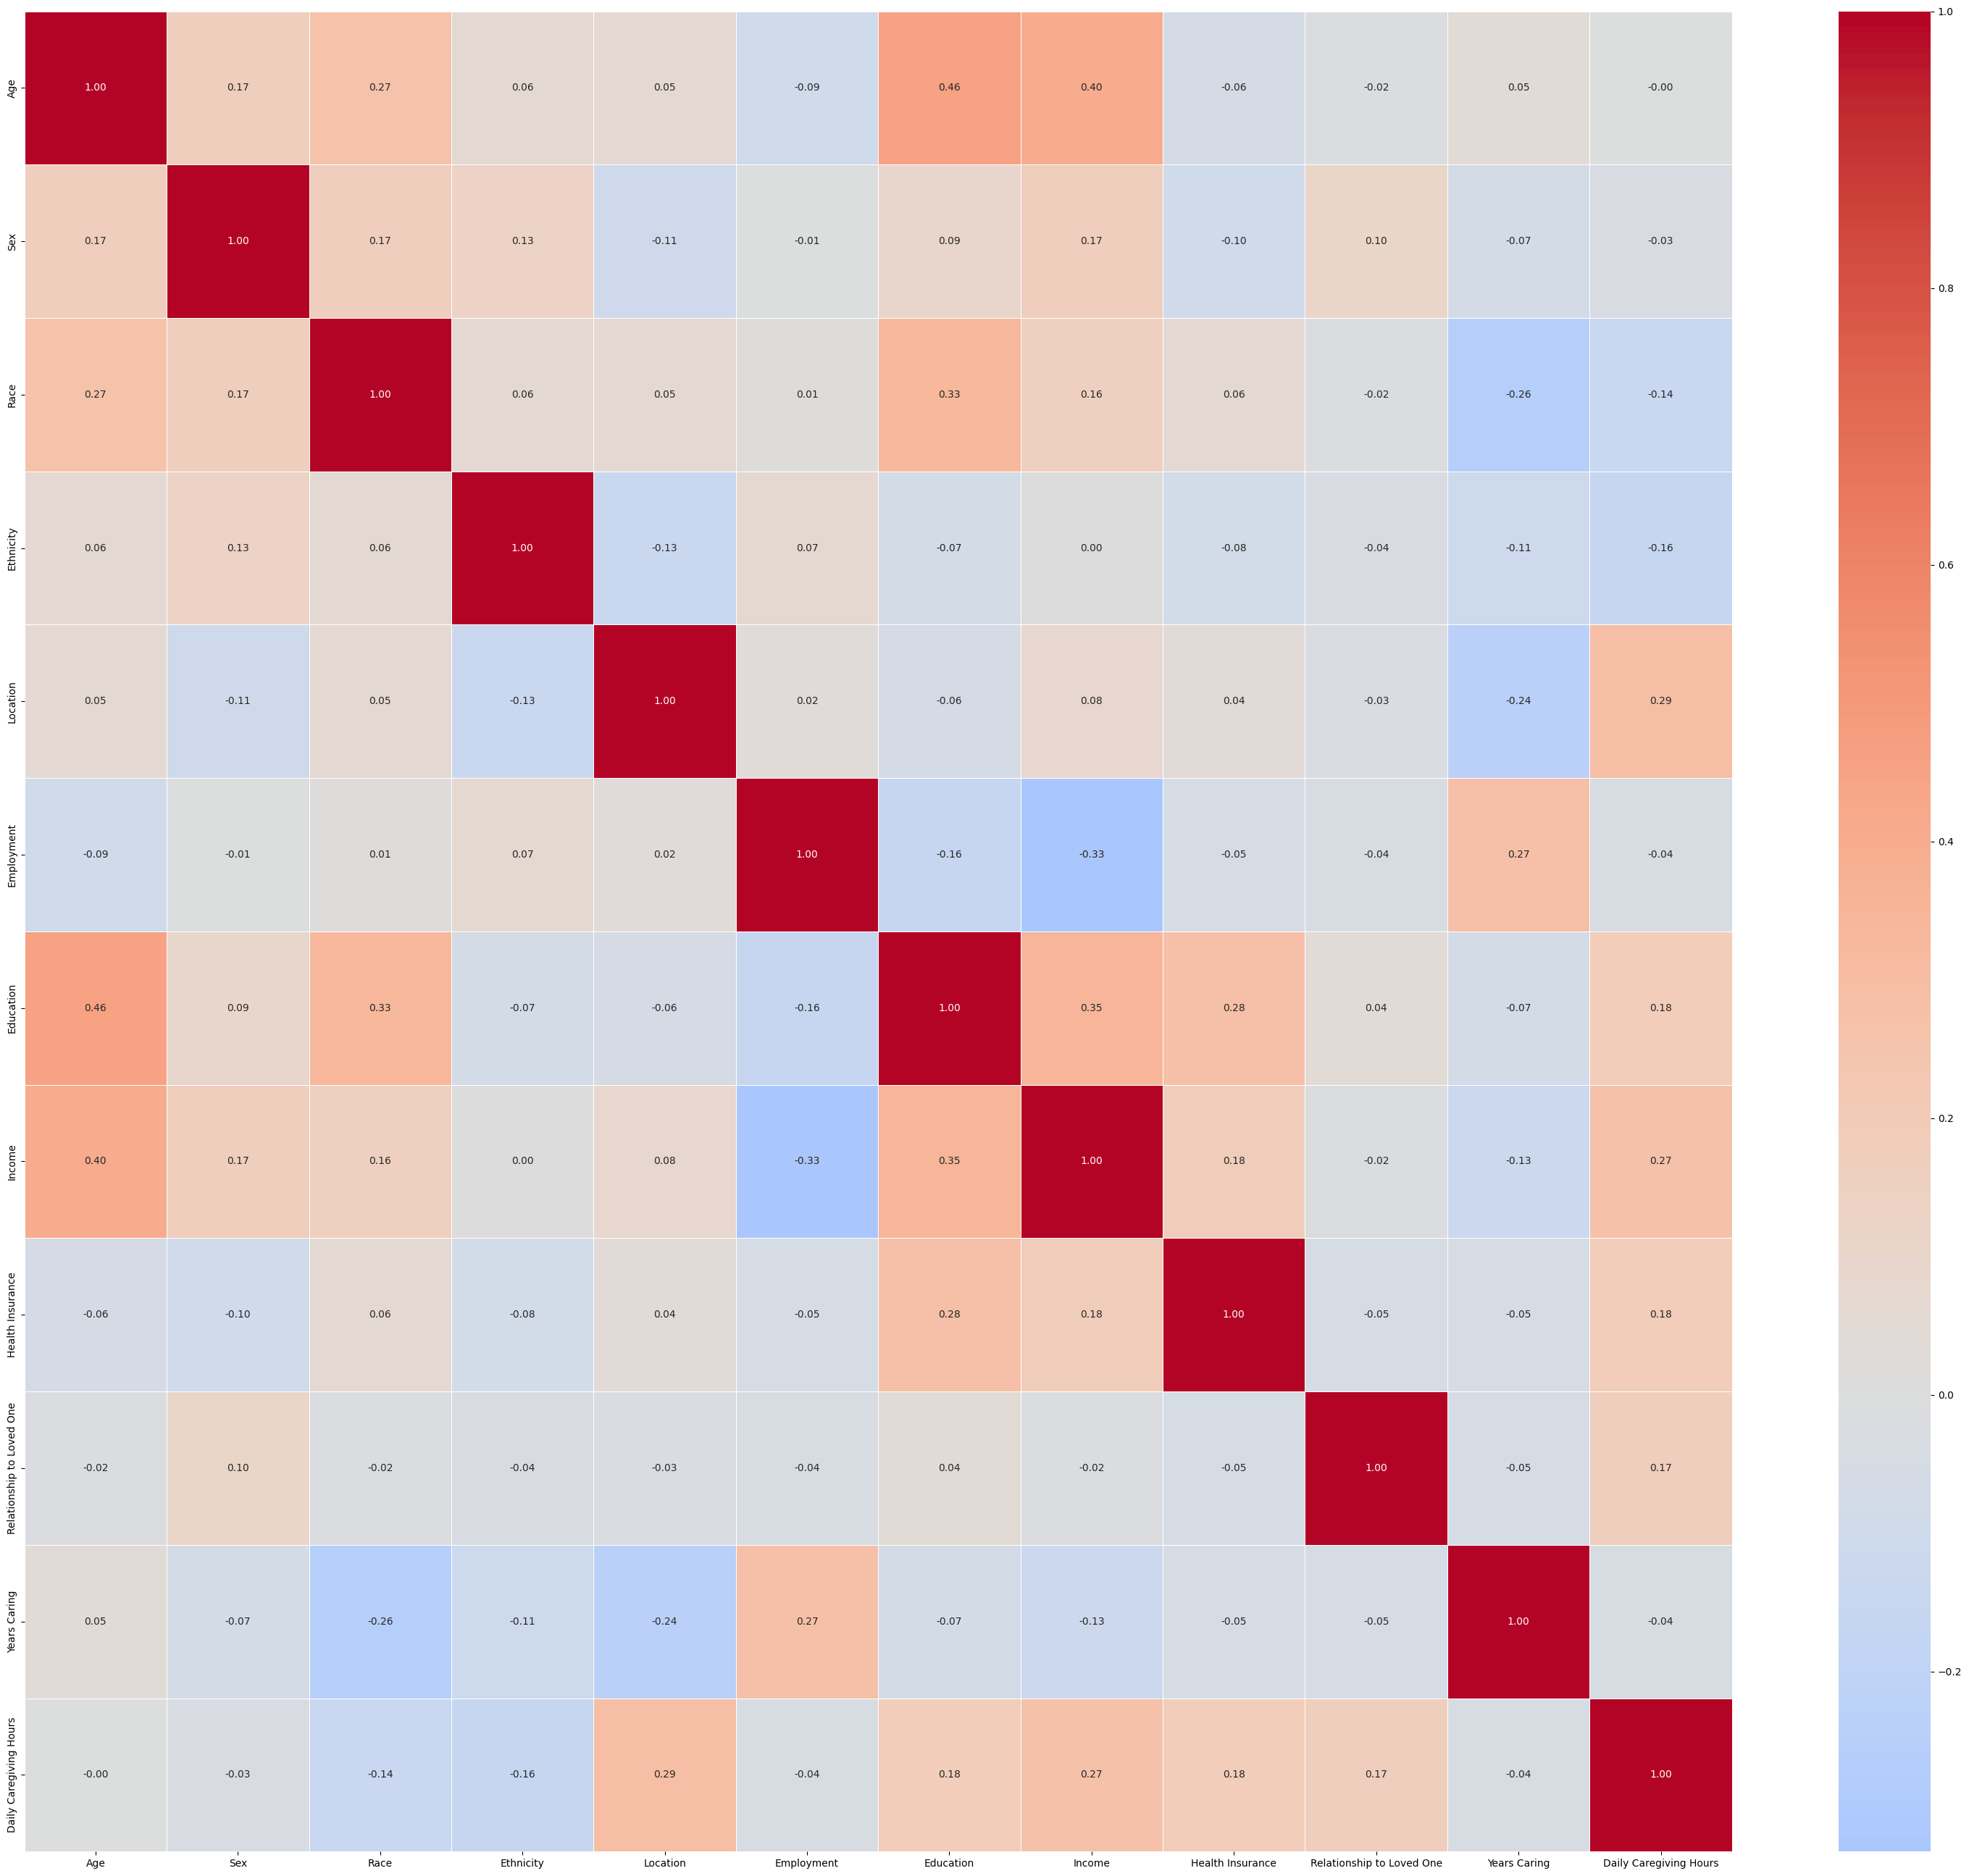

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
selected_columns = data.columns[1:13]  # Select 2nd to 13th columns (Indexing starts from 0)

# Compute correlation matrix for the selected columns
corr_matrix = data[selected_columns].corr()

# Create a larger figure
plt.figure(figsize=(30, 26))  # Adjust size as needed

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f', linewidths=0.5)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Save the plot as a JPEG file
plt.savefig('heatmap.jpg', format='jpeg', dpi=300)

# Show the plot
plt.show()


#PHQ LR

**So, features are almost independant and we are eligible to use SHAP!**


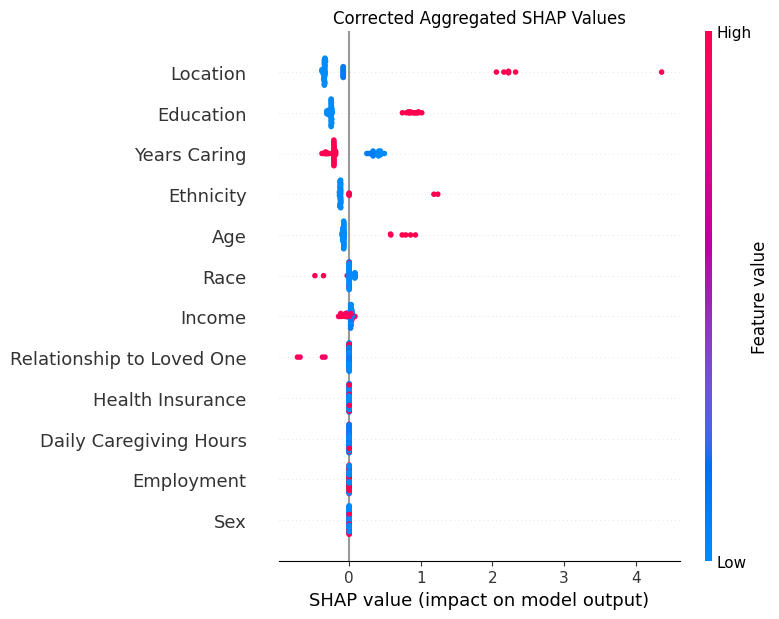

Accuracy: 0.69
F1 Score: 0.55
Precision: 0.67
Recall: 0.46
Feature Selection Frequency:
 Location                     65
Years Caring                 65
Income                       65
Age                          65
Education                    65
Ethnicity                    60
Race                         26
Relationship to Loved One     4
Name: count, dtype: int64


In [38]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score

# Load data
data = pd.read_csv('PHQ_preprocessed.csv')
participant_ids = data['Participant ID']
X = data.drop(['PHQ_score', 'Participant ID'], axis=1)
y = data['PHQ_score']
all_features = X.columns.tolist()

# Initialize storage
shap_matrix = np.zeros((len(participant_ids), len(all_features)))
data_matrix = np.zeros((len(participant_ids), len(all_features)))
all_base_values = []
y_true = []
y_pred = []
all_selected_features_PHQ_LR = []

# LOSO-CV
loo = LeaveOneOut()

for i, (train_index, test_index) in enumerate(loo.split(participant_ids)):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Feature selection (ensure this uses NON-normalized data if chi-square requires)
    temp_train_data = pd.concat([X_train, y_train], axis=1)
    temp_train_data['Participant ID'] = participant_ids.iloc[train_index].values
    selected_features, _ = feature_selection(temp_train_data, 'PHQ_score', ['Participant ID'])
    all_selected_features_PHQ_LR.append(selected_features)

    # Normalize within fold
    X_train_normalized = X_train.values
    X_test_normalized = X_test.values

    # Get indices of selected features
    selected_indices = [X.columns.get_loc(f) for f in selected_features]

    # SVM model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_normalized[:, selected_indices], y_train)

    # Store predictions
    y_test_pred = model.predict(X_test_normalized[:, selected_indices])
    y_true.append(y_test.values[0])
    y_pred.append(y_test_pred[0])

    # Compute SHAP values
    explainer = shap.LinearExplainer(model, X_train_normalized[:, selected_indices])
    shap_values = explainer.shap_values(X_test_normalized[:, selected_indices])

    # Store SHAP values and data
    for j, idx in enumerate(selected_indices):
        shap_matrix[i, idx] = shap_values[0][j]
    data_matrix[i, :] = X_test_normalized[0]  # Store normalized test instance
    all_base_values.append(explainer.expected_value)

# Create Explanation object
explanation = shap.Explanation(
    values=shap_matrix,
    base_values=np.array(all_base_values),
    data=data_matrix,
    feature_names=all_features
)

# Generate plot
plt.figure(figsize=(12, 8))
shap.summary_plot(explanation, plot_type="dot", show=False)
plt.title("Corrected Aggregated SHAP Values")
plt.xlabel("SHAP value (impact on model output)")
plt.tight_layout()
plt.savefig('corrected_shap_plot.png', dpi=300)
plt.show()

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='binary')
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
# Feature frequency
feature_counts = pd.Series([f for sublist in all_selected_features_PHQ_LR for f in sublist]).value_counts()
print("Feature Selection Frequency:\n", feature_counts)

Error in fold 1 for Age: cannot reshape array of size 1 into shape (2)
Error in fold 1 for Education: cannot reshape array of size 1 into shape (2)
Error in fold 1 for Ethnicity: cannot reshape array of size 1 into shape (2)


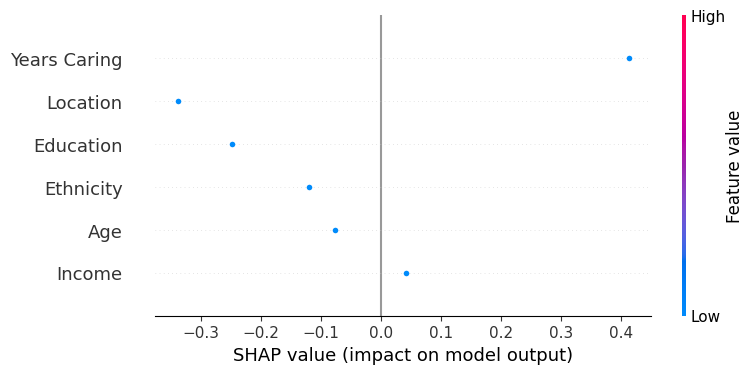

Error in fold 2 for Age: cannot reshape array of size 1 into shape (2)
Error in fold 2 for Education: cannot reshape array of size 1 into shape (2)
Error in fold 2 for Ethnicity: cannot reshape array of size 1 into shape (2)
Error in fold 2 for Race: cannot reshape array of size 1 into shape (2)


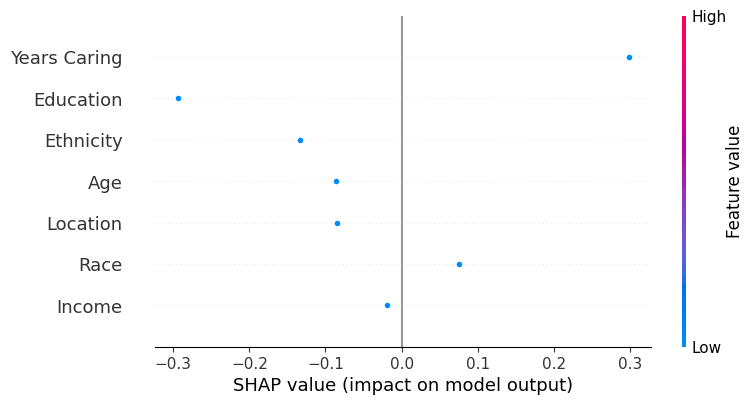

Error in fold 3 for Age: cannot reshape array of size 1 into shape (2)
Error in fold 3 for Education: cannot reshape array of size 1 into shape (2)
Error in fold 3 for Ethnicity: cannot reshape array of size 1 into shape (2)


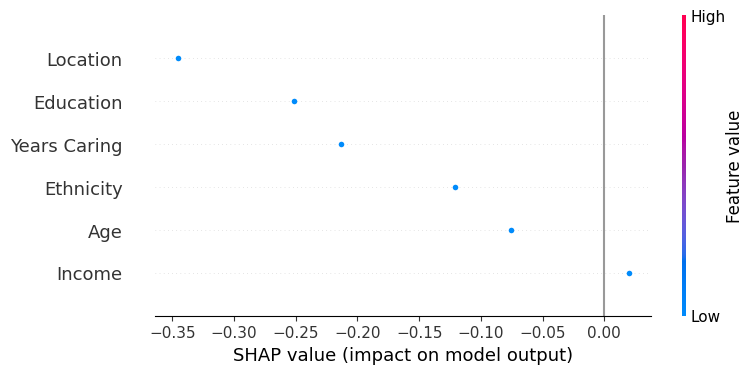

Error in fold 4 for Age: cannot reshape array of size 1 into shape (2)
Error in fold 4 for Education: cannot reshape array of size 1 into shape (2)
Error in fold 4 for Ethnicity: cannot reshape array of size 1 into shape (2)
Error in fold 4 for Race: cannot reshape array of size 1 into shape (2)


KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt
import pandas as pd
import shap
from collections import Counter

# Load the dataset
data = pd.read_csv('PHQ_preprocessed.csv')

participant_ids = data['Participant ID']
X = data.drop('PHQ_score', axis=1)
y = data['PHQ_score']

# Initialize variables
y_true = []
y_pred = []
all_selected_features_PHQ_LR = []

# Set up LOSO-CV
loo = LeaveOneOut()

# Loop through each train-test split
for i, (train_index, test_index) in enumerate(loo.split(participant_ids)):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Feature selection
    temp_train_data = pd.concat([X_train, y_train], axis=1)
    temp_train_data['Participant ID'] = participant_ids.iloc[train_index].values
    selected_features, _ = feature_selection(temp_train_data, 'PHQ_score', ['Participant ID'])
    all_selected_features_PHQ_LR.append(selected_features)

    # Select features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Train model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_selected, y_train)

    # =============================================
    # NEW: Partial Dependence Plots for this fold
    # =============================================
    # Inside your PDP loop:
    for feature in selected_features:
        try:
            # Get the index of the feature in the DataFrame
            feature_index = X_train_selected.columns.get_loc(feature)

            # Check if feature is binary (0/1)
            unique_vals = np.unique(X_train_selected[feature])
            is_binary = len(unique_vals) == 2 and set(unique_vals) == {0, 1}

            # Compute PDP with proper parameters
            pdp = partial_dependence(
                estimator=model,
                X=X_train_selected,
                features=[feature_index],  # Use index-based specification
                categorical_features=[feature_index] if is_binary else None,
                grid_resolution=2 if is_binary else 20
            )

            # Plotting code remains the same...

        except Exception as e:
            print(f"Error in fold {i+1} for {feature}: {str(e)}")
            continue

    # SHAP explanation (existing code)
    explainer = shap.Explainer(model, X_train_selected)
    shap_values = explainer(X_test_selected)
    shap.plots.beeswarm(shap_values)

    # Prediction and evaluation (existing code)
    y_test_pred = model.predict(X_test_selected)
    y_true.append(y_test.values[0])
    y_pred.append(y_test_pred[0])

# Existing evaluation code
print('Actual:', y_true)
print('Predicted:', y_pred)
print(f"\nLOSO-CV Accuracy: {accuracy_score(y_true, y_pred):.2f}")
print(f"LOSO-CV F1 Score: {f1_score(y_true, y_pred, average='binary'):.2f}")

# Feature frequency (existing code)
print("\nFeature selection frequency:")
feature_counts = Counter([f for sublist in all_selected_features_PHQ_LR for f in sublist])
for f, c in feature_counts.most_common():
    print(f"{f}: {c}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score

# Load the dataset
data = pd.read_csv('PHQ_preprocessed.csv')

participant_ids = data['Participant ID']
X = data.drop('PHQ_score', axis=1)
y = data['PHQ_score']

# Set up LOSO-CV
loo = LeaveOneOut()

# Loop through each train-test split
for i, (train_index, test_index) in enumerate(loo.split(participant_ids)):
    if i == 0:  # First epoch
        # Split data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Create a temporary DataFrame for feature selection
        temp_train_data = pd.concat([X_train, y_train], axis=1)
        temp_train_data['Participant ID'] = participant_ids.iloc[train_index].values

        # Perform feature selection on training data
        selected_features, _ = feature_selection(temp_train_data, 'PHQ_score', ['Participant ID'], n_features=8)

        # Select features for training
        X_train_selected = X_train[selected_features]

        # Save X_train_selected to a CSV file
        X_train_selected.to_csv('X_train_selected_first_epoch.csv', index=False)

        print("X_train_selected for the first epoch has been saved to 'X_train_selected_first_epoch.csv'")
        break  # Exit the loop after processing the first epoch

X_train_selected for the first epoch has been saved to 'X_train_selected_first_epoch.csv'


#ZBI LR

LOSO-CV Accuracy: 0.71
LOSO-CV F1 Score: 0.75


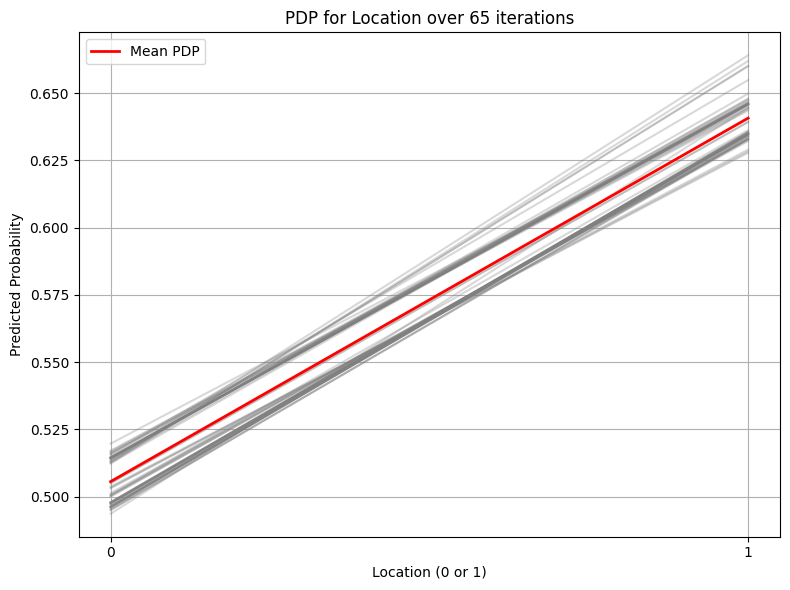

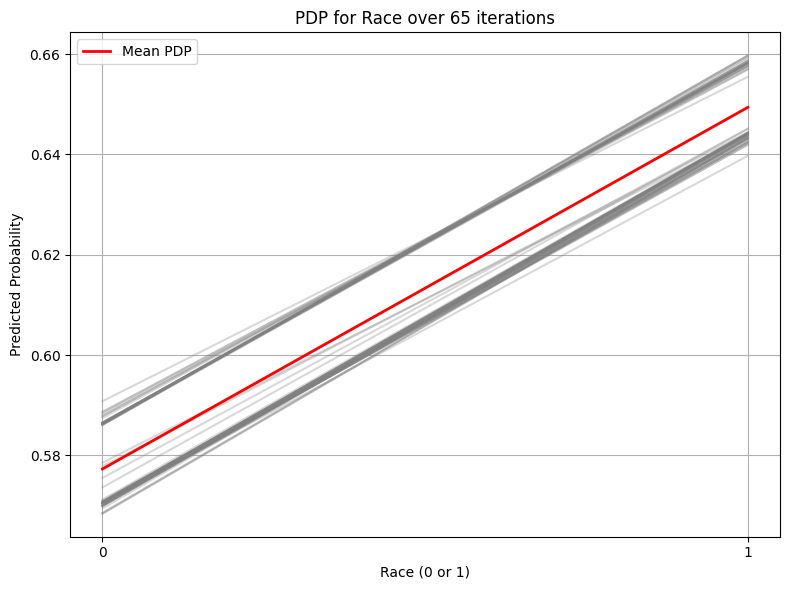

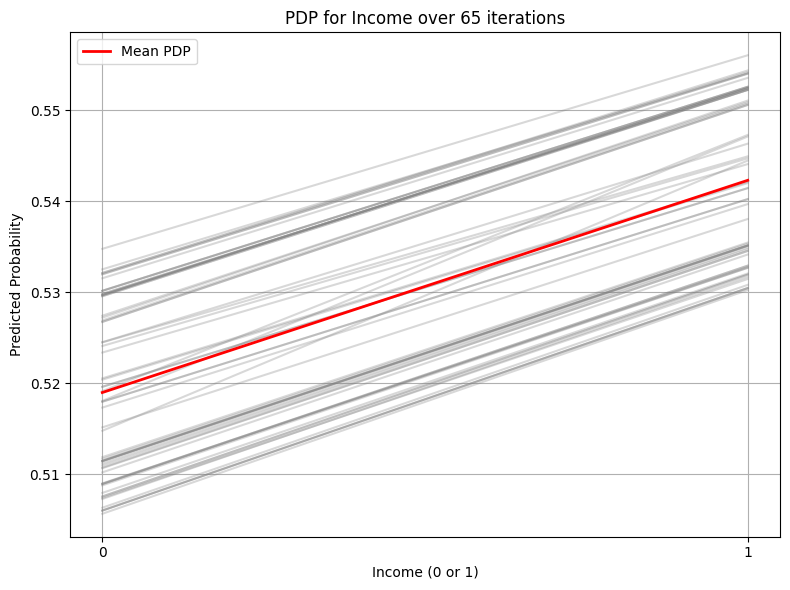

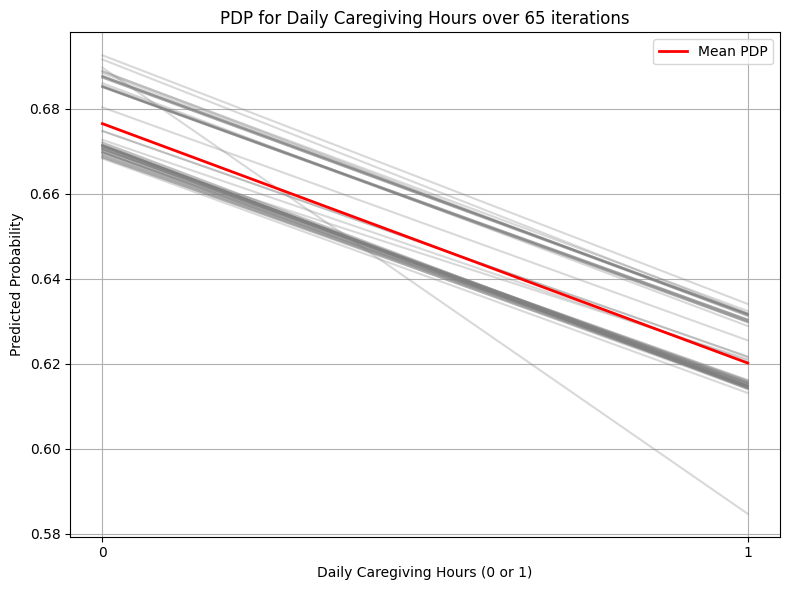

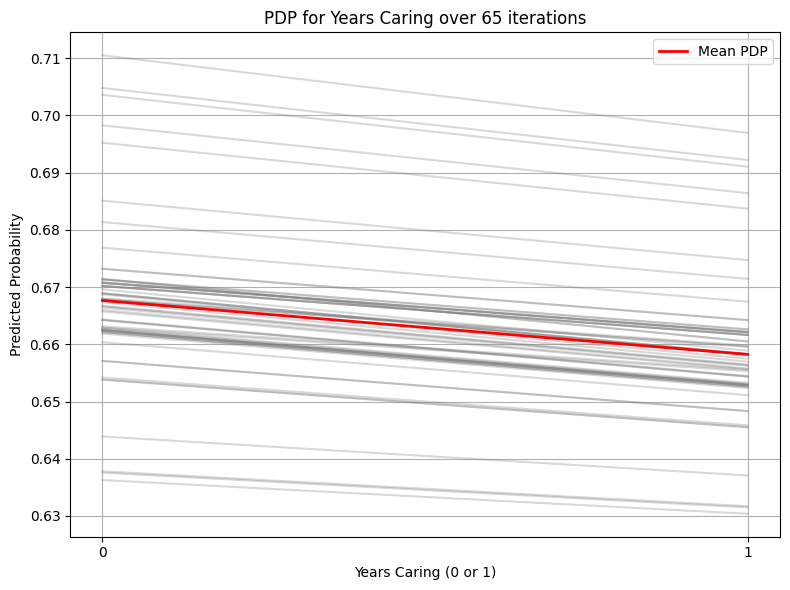

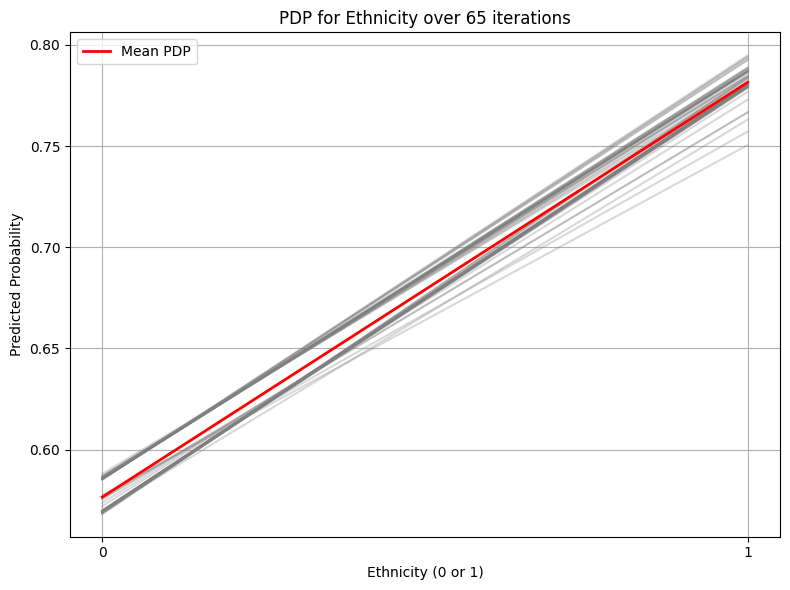

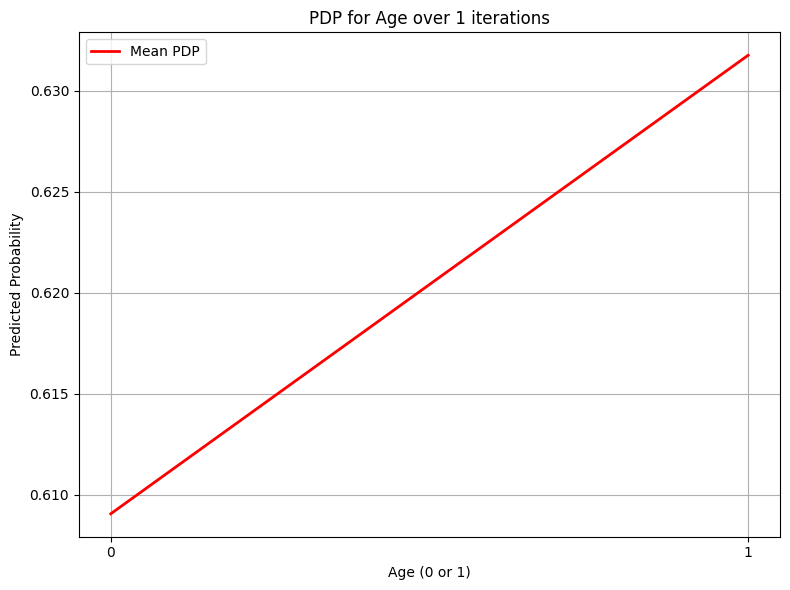

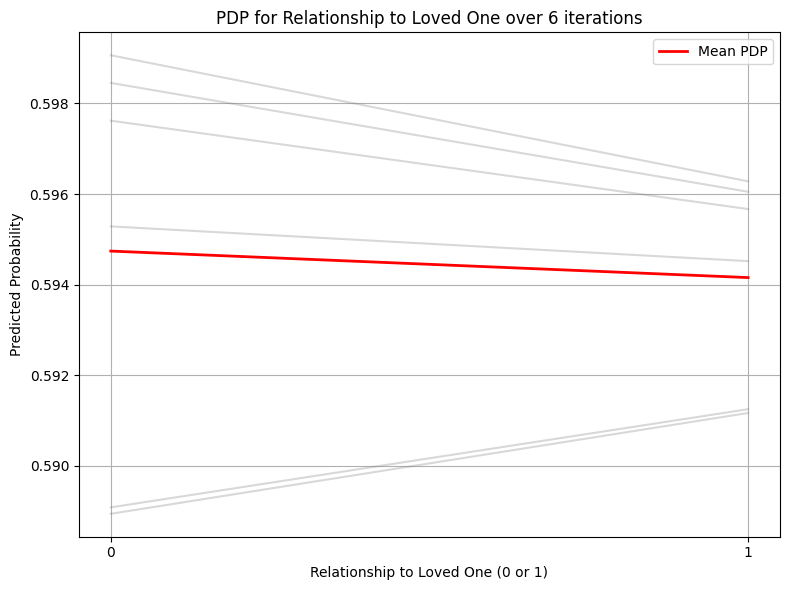

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score
from collections import defaultdict, Counter

# Load the dataset
data = pd.read_csv('ZBI_preprocessed.csv')

participant_ids = data['Participant ID']
X = data.drop('ZBI_score', axis=1)
y = data['ZBI_score']

# Initialize PDP data storage
pdp_data = defaultdict(list)  # Stores PDP values for each feature across iterations

# Initialize variables to store predictions and actual values
y_true = []
y_pred = []
all_selected_features_ZBI_LR = []

# Set up LOSO-CV
loo = LeaveOneOut()

# Loop through each train-test split
for i, (train_index, test_index) in enumerate(loo.split(participant_ids)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a temporary DataFrame for feature selection
    temp_train_data = pd.concat([X_train, y_train], axis=1)
    temp_train_data['Participant ID'] = participant_ids.iloc[train_index].values

    # Perform feature selection on training data
    selected_features, _ = feature_selection(temp_train_data, 'ZBI_score', ['Participant ID'])
    all_selected_features_ZBI_LR.append(selected_features)

    # Select features for training and testing
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_selected, y_train)

    # Compute PDP for each selected feature in this iteration
    for feature in selected_features:
        pdp_values = []
        for value in [0, 1]:  # Binary features take values 0 and 1
            X_temp = X_train_selected.copy()
            X_temp[feature] = value
            y_proba = model.predict_proba(X_temp)[:, 1]
            pdp_values.append(np.mean(y_proba))
        pdp_data[feature].append(pdp_values)

    # Predict on the test set
    y_test_pred = model.predict(X_test_selected)
    y_true.append(y_test.values[0])
    y_pred.append(y_test_pred[0])

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='binary')
print(f"LOSO-CV Accuracy: {accuracy:.2f}")
print(f"LOSO-CV F1 Score: {f1:.2f}")

# Plot PDPs for each feature with all iterations
for feature in pdp_data:
    if len(pdp_data[feature]) > 0:
        plt.figure(figsize=(8, 6))
        x_values = [0, 1]  # Binary features
        for pdp_values in pdp_data[feature]:
            plt.plot(x_values, pdp_values, alpha=0.3, color='grey')
        mean_pdp = np.mean(pdp_data[feature], axis=0)
        plt.plot(x_values, mean_pdp, 'r-', linewidth=2, label='Mean PDP')
        plt.xlabel(f'{feature} (0 or 1)')
        plt.ylabel('Predicted Probability')
        plt.title(f'PDP for {feature} over {len(pdp_data[feature])} iterations')
        plt.xticks([0, 1], ['0', '1'])
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score


# Load the dataset
data = pd.read_csv('ZBI_preprocessed.csv')

participant_ids = data['Participant ID']
X = data.drop('ZBI_score', axis=1)
y = data['ZBI_score']

# Initialize variables to store predictions and actual values
y_true = []
y_pred = []

# Initialize a list to store selected features for each iteration
all_selected_features_ZBI_LR = []

# Set up LOSO-CV
loo = LeaveOneOut()

# Loop through each train-test split
for i, (train_index, test_index) in enumerate(loo.split(participant_ids)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a temporary DataFrame for feature selection
    temp_train_data = pd.concat([X_train, y_train], axis=1)
    temp_train_data['Participant ID'] = participant_ids.iloc[train_index].values

    # Perform feature selection on training data
    selected_features, _ = feature_selection(temp_train_data, 'ZBI_score', ['Participant ID'])

    # Append selected features to the list
    all_selected_features_ZBI_LR.append(selected_features)

    # Print selected features for each iteration
    print(f"Iteration {i+1} - Selected Features: {selected_features}")

    # Select features for training and testing
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_selected, y_train)

    # Predict on the test set
    y_test_pred = model.predict(X_test_selected)

    # Store the actual and predicted values
    y_true.append(y_test.values[0])
    y_pred.append(y_test_pred[0])

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='binary')
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

all_features = [feature for sublist in all_selected_features_ZBI_LR for feature in sublist]
feature_counts_ZBI_LR = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts_ZBI_LR.most_common():
    print(f"{feature}: {count}")

Iteration 1 - Selected Features: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2 - Selected Features: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3 - Selected Features: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4 - Selected Features: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5 - Selected Features: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6 - Selected Features: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7 - Selected Features: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8 - Selected Features: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9 - Selected Features: ['Locati

# PHQ SVM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score


# Load the dataset
data = pd.read_csv('PHQ_preprocessed.csv')

participant_ids = data['Participant ID']
X = data.drop('PHQ_score', axis=1)
y = data['PHQ_score']

# Initialize variables to store predictions and actual values
y_true = []
y_pred = []

# Initialize a list to store selected features for each iteration
all_selected_features_PHQ_SVM = []

# Set up LOSO-CV
loo = LeaveOneOut()

# Loop through each train-test split
for i, (train_index, test_index) in enumerate(loo.split(participant_ids)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a temporary DataFrame for feature selection
    temp_train_data = pd.concat([X_train, y_train], axis=1)
    temp_train_data['Participant ID'] = participant_ids.iloc[train_index].values

    # Perform feature selection on training data
    selected_features, _ = feature_selection(temp_train_data, 'PHQ_score', ['Participant ID'])

    # Append selected features to the list
    all_selected_features_PHQ_SVM.append(selected_features)

    # Print selected features for each iteration
    print(f"Iteration {i+1} - Selected Features: {selected_features}")

    # Select features for training and testing
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Logistic regression model
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train_selected, y_train)

    # Predict on the test set
    y_test_pred = model.predict(X_test_selected)

    # Store the actual and predicted values
    y_true.append(y_test.values[0])
    y_pred.append(y_test_pred[0])

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='binary')
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

all_features = [feature for sublist in all_selected_features_PHQ_SVM for feature in sublist]
feature_counts_PHQ_SVM = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts_PHQ_SVM.most_common():
    print(f"{feature}: {count}")

Iteration 1 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 2 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 3 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 4 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 5 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 6 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 7 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 8 - Selected Features: ['Location', 'Years Caring', 'Income', 'Education', 'Age', 'Ethnicity', 'Race']
Iteration 9 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 10 - Selected

# ZBI SVM

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

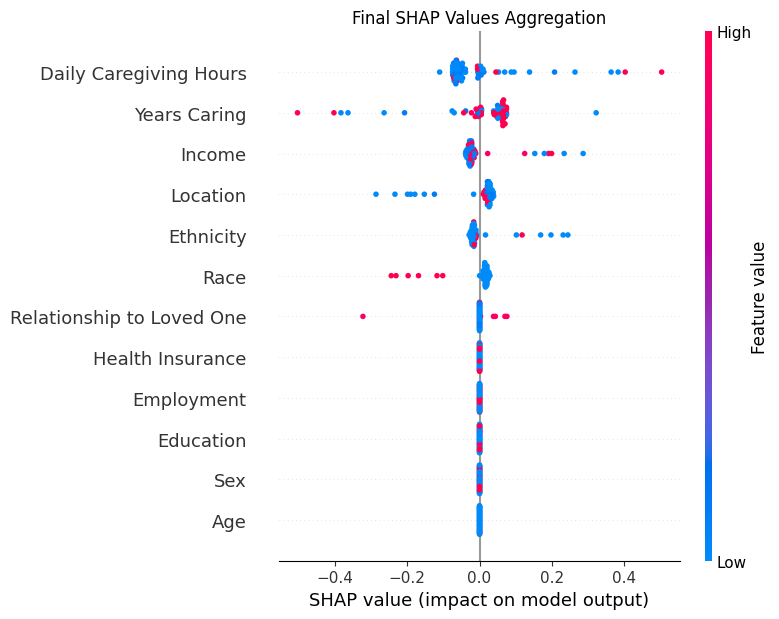

Accuracy: 0.77, F1: 0.78
Feature Selection Frequency:
 Location                     65
Race                         65
Income                       65
Daily Caregiving Hours       65
Years Caring                 65
Ethnicity                    65
Relationship to Loved One     6
Age                           1
Name: count, dtype: int64


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score
from collections import Counter

# Load data
data = pd.read_csv('ZBI_preprocessed.csv')
participant_ids = data['Participant ID']
X = data.drop(['ZBI_score', 'Participant ID'], axis=1)
y = data['ZBI_score']
all_features = X.columns.tolist()

# Initialize storage
shap_matrix = np.zeros((len(participant_ids), len(all_features)))
data_matrix = np.zeros((len(participant_ids), len(all_features)))
all_base_values = []
y_true = []
y_pred = []
all_selected_features_ZBI_SVM = []


# LOSO-CV
loo = LeaveOneOut()

for i, (train_index, test_index) in enumerate(loo.split(participant_ids)):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Feature selection
    temp_train_data = pd.concat([X_train, y_train], axis=1)
    temp_train_data['Participant ID'] = participant_ids.iloc[train_index].values
    selected_features, _ = feature_selection(temp_train_data, 'ZBI_score', ['Participant ID'])
    all_selected_features_ZBI_SVM.append(selected_features)

    # Get MASK of selected features
    selected_mask = np.isin(all_features, selected_features)
    selected_indices = np.where(selected_mask)[0]

    # SVM model WITH PROBABILITY ENABLED
    model = SVC(kernel='linear', probability=True, random_state=42)  # <- Crucial parameter
    model.fit(X_train.values[:, selected_mask], y_train)

    # Store predictions
    y_test_pred = model.predict(X_test.values[:, selected_mask])
    y_true.append(y_test.values[0])
    y_pred.append(y_test_pred[0])

    # Compute SHAP values
    background = shap.sample(X_train.values[:, selected_mask], 64) #number of background samples
    explainer = shap.KernelExplainer(model.predict_proba, background)
    shap_values = explainer.shap_values(X_test.values[:, selected_mask])

    # Handle SHAP values and base values
    if isinstance(shap_values, list):
        pred_class = y_test_pred[0]
        class_shap = shap_values[pred_class][0]
        base_value = explainer.expected_value[pred_class]
    else:
        class_shap = shap_values[0]
        base_value = explainer.expected_value

    class_shap = np.ravel(class_shap)

    # Store SHAP values
    for j, idx in enumerate(selected_indices):
        if j < len(class_shap):
            shap_matrix[i, idx] = class_shap[j]

    data_matrix[i, :] = X_test.values[0]
    all_base_values.append(base_value)

# Create Explanation object
explanation = shap.Explanation(
    values=shap_matrix,
    base_values=np.array(all_base_values),
    data=data_matrix,
    feature_names=all_features
)

# Generate plot
plt.figure(figsize=(12, 8))
shap.summary_plot(explanation, plot_type="dot", show=False)
plt.title("Final SHAP Values Aggregation")
plt.xlabel("SHAP value (impact on model output)")
plt.tight_layout()
plt.savefig('final_shap_plot.png', dpi=300)
plt.show()

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='binary')
print(f"Accuracy: {accuracy:.2f}, F1: {f1:.2f}")

# Feature frequency analysis
feature_counts = pd.Series(
    [f for sublist in all_selected_features_ZBI_SVM for f in sublist]
).value_counts()
print("Feature Selection Frequency:\n", feature_counts)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score


# Load the dataset
data = pd.read_csv('ZBI_preprocessed.csv')

participant_ids = data['Participant ID']
X = data.drop('ZBI_score', axis=1)
y = data['ZBI_score']

# Initialize variables to store predictions and actual values
y_true = []
y_pred = []

# Initialize a list to store selected features for each iteration
all_selected_features_ZBI_SVM = []

# Set up LOSO-CV
loo = LeaveOneOut()

# Loop through each train-test split
for i, (train_index, test_index) in enumerate(loo.split(participant_ids)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a temporary DataFrame for feature selection
    temp_train_data = pd.concat([X_train, y_train], axis=1)
    temp_train_data['Participant ID'] = participant_ids.iloc[train_index].values

    # Perform feature selection on training data
    selected_features, _ = feature_selection(temp_train_data, 'ZBI_score', ['Participant ID'])

    # Append selected features to the list
    all_selected_features_ZBI_SVM.append(selected_features)

    # Print selected features for each iteration
    print(f"Iteration {i+1} - Selected Features: {selected_features}")

    # Select features for training and testing
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # SVM model
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train_selected, y_train)

    # Predict on the test set
    y_test_pred = model.predict(X_test_selected)

    # Store the actual and predicted values
    y_true.append(y_test.values[0])
    y_pred.append(y_test_pred[0])

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='binary')
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

all_features = [feature for sublist in all_selected_features_ZBI_SVM for feature in sublist]
feature_counts_ZBI_SVM = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts_ZBI_SVM.most_common():
    print(f"{feature}: {count}")

Iteration 1 - Selected Features: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2 - Selected Features: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3 - Selected Features: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4 - Selected Features: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5 - Selected Features: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6 - Selected Features: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7 - Selected Features: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8 - Selected Features: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9 - Selected Features: ['Locati

LOSO-CV Accuracy: 0.77
LOSO-CV F1 Score: 0.78

Feature selection frequency:
Location: 65
Race: 65
Income: 65
Daily Caregiving Hours: 65
Years Caring: 65
Ethnicity: 65
Relationship to Loved One: 6
Age: 1


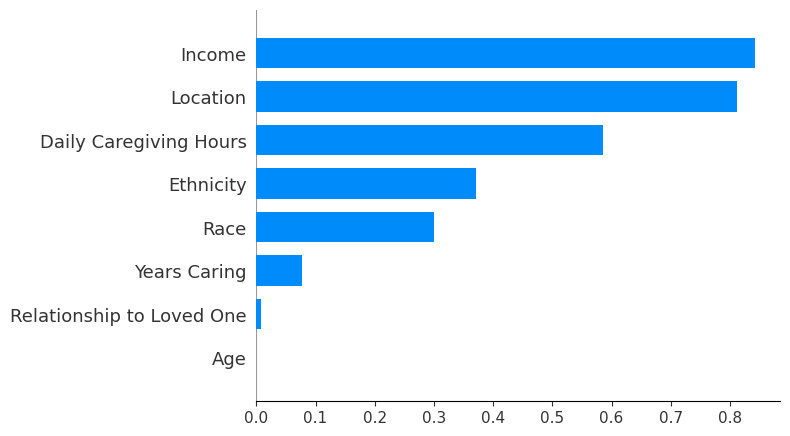

In [ ]:
import shap
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('ZBI_preprocessed.csv')

participant_ids = data['Participant ID']
X = data.drop('ZBI_score', axis=1)
y = data['ZBI_score']

# Initialize variables
y_true = []
y_pred = []
all_selected_features_ZBI_SVM = []
shap_values_list = []
test_indices = []  # Store test indices for later SHAP alignment

# Set up LOSO-CV
loo = LeaveOneOut()

# Loop through each train-test split
for i, (train_index, test_index) in enumerate(loo.split(participant_ids)):
    # Store test index
    test_indices.append(test_index[0])

    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create temporary DataFrame for feature selection
    temp_train_data = pd.concat([X_train, y_train], axis=1)
    temp_train_data['Participant ID'] = participant_ids.iloc[train_index].values

    # Perform feature selection (assume this function is defined)
    selected_features, _ = feature_selection(temp_train_data, 'ZBI_score', ['Participant ID'])
    all_selected_features_ZBI_SVM.append(selected_features)

    # Select features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Train SVM model
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train_selected, y_train)

    # Predict and store results
    y_test_pred = model.predict(X_test_selected)
    y_true.append(y_test.values[0])
    y_pred.append(y_test_pred[0])

    # Compute SHAP values using LinearExplainer for SVM (linear kernel)
    explainer = shap.LinearExplainer(model, X_train_selected)
    shap_values = explainer.shap_values(X_test_selected)

    # Flatten the SHAP values (in case it is a 2D array)
    shap_values_list.append(shap_values[0].flatten())  # Flatten the SHAP values for the positive class

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='binary')
print(f"LOSO-CV Accuracy: {accuracy:.2f}")
print(f"LOSO-CV F1 Score: {f1:.2f}")

# Feature selection frequency
all_features = [feature for sublist in all_selected_features_ZBI_SVM for feature in sublist]
feature_counts_ZBI_SVM = Counter(all_features)
print("\nFeature selection frequency:")
for feature, count in feature_counts_ZBI_SVM.most_common():
    print(f"{feature}: {count}")

# Create union of all selected features
all_features_union = sorted(set(all_features))

# Create aligned SHAP matrix and feature matrix
shap_expanded = np.zeros((len(shap_values_list), len(all_features_union)))
feature_matrix = np.zeros((len(shap_values_list), len(all_features_union)))

for i in range(len(shap_values_list)):
    # Get data for current fold
    selected_features = all_selected_features_ZBI_SVM[i]
    shap_vals_vector = shap_values_list[i]  # SHAP values for test instance

    x_test_i = X.iloc[test_indices[i]]     # Feature values for test instance

    # Align SHAP values to feature union
    for j, feat in enumerate(all_features_union):
        if feat in selected_features:
            pos = selected_features.index(feat)
            shap_expanded[i, j] = shap_vals_vector[pos]
        feature_matrix[i, j] = x_test_i[feat]

# Generate SHAP summary plot
shap.summary_plot(shap_expanded_abs, feature_matrix, feature_names=all_features_union, plot_type="bar", show=False)

# Remove SHAP's automatic x-axis label
ax = plt.gca()         # Get current axis
ax.set_xlabel("")      # Remove x-axis label (SHAP summary title)
ax.set_title("")       # Remove plot title (if any)

# Save the plot as EPS
plt.savefig('shap_summary_plot.eps', format="eps", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


Accuracy: 0.77
F1 Score: 0.78
Precision: 0.90
Recall: 0.69

Feature selection frequency:
Location: 65
Race: 65
Income: 65
Daily Caregiving Hours: 65
Years Caring: 65
Ethnicity: 65
Relationship to Loved One: 6
Age: 1


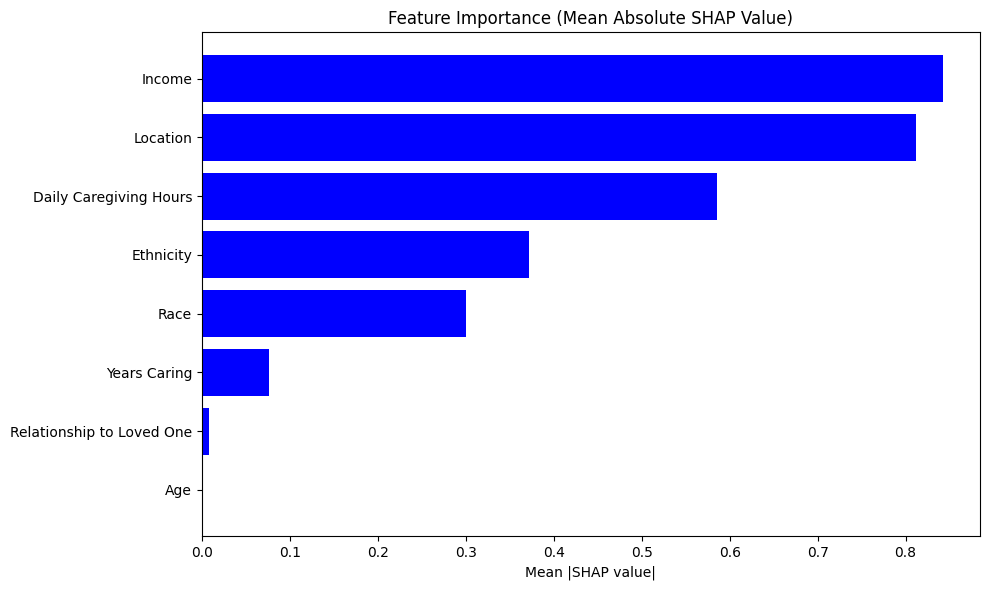

In [ ]:
import shap
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('ZBI_preprocessed.csv')

participant_ids = data['Participant ID']
X = data.drop('ZBI_score', axis=1)
y = data['ZBI_score']

# Initialize variables
y_true = []
y_pred = []
all_selected_features = []  # Store selected features for each fold
test_indices = []  # Store test indices for SHAP alignment
shap_values_list = []  # Store SHAP values for each test instance

# Set up LOSO-CV
loo = LeaveOneOut()

# Loop through each train-test split
for train_index, test_index in loo.split(participant_ids):
    test_idx = test_index[0]
    test_indices.append(test_idx)

    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create temporary DataFrame for feature selection
    temp_train_data = pd.concat([X_train, y_train], axis=1)
    temp_train_data['Participant ID'] = participant_ids.iloc[train_index].values

    # Perform feature selection (assume this function is defined)
    selected_features, _ = feature_selection(temp_train_data, 'ZBI_score', ['Participant ID'])
    all_selected_features.append(selected_features)

    # Select features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Train SVM model with linear kernel
    model = SVC(kernel='linear', random_state=42, probability=True)
    model.fit(X_train_selected, y_train)

    # Predict and store results
    y_pred.append(model.predict(X_test_selected)[0])
    y_true.append(y_test.values[0])

    # Compute SHAP values using LinearExplainer (more efficient for linear models)
    explainer = shap.LinearExplainer(model, X_train_selected)
    shap_values = explainer.shap_values(X_test_selected)

    # Store SHAP values as a 1D array
    shap_values_list.append(shap_values[0])  # [0] because only one test sample per fold

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='binary')
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Feature selection frequency
feature_counts = Counter([feature for features in all_selected_features for feature in features])
print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")

# Create union of all selected features
all_features_union = sorted(set.union(*[set(features) for features in all_selected_features]))

# Create aligned SHAP matrix
shap_matrix = np.zeros((len(shap_values_list), len(all_features_union)))

# Align SHAP values to the union of features
for i, (shap_vals, selected) in enumerate(zip(shap_values_list, all_selected_features)):
    for j, feature in enumerate(all_features_union):
        if feature in selected:
            idx_in_selected = selected.index(feature)
            shap_matrix[i, j] = shap_vals[idx_in_selected]
        # Else remains 0 (feature not selected in this fold)

# Compute mean absolute SHAP values for the summary plot
mean_abs_shap = np.mean(np.abs(shap_matrix), axis=0)

# Create sorted indices for plotting
sorted_idx = np.argsort(mean_abs_shap)[::-1]
sorted_features = [all_features_union[i] for i in sorted_idx]
sorted_values = mean_abs_shap[sorted_idx]

# Create bar plot of mean absolute SHAP values
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_values, color='blue')
plt.xlabel('Mean |SHAP value|')
plt.title('Feature Importance (Mean Absolute SHAP Value)')
plt.gca().invert_yaxis()  # Most important feature on top
plt.tight_layout()
plt.show()

Confusion Matrix:
Low Burden (0): 23 | High Burden (1): 3
Low Burden (0): 12 | High Burden (1): 27


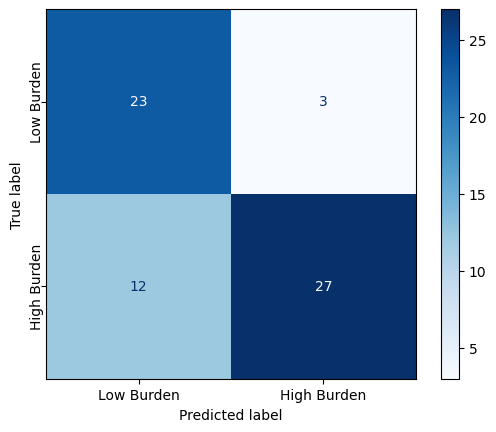

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define custom labels
labels = ['Low Burden', 'High Burden']

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format="d")  # You can change the colormap and format as needed

# Rotate the labels on the y-axis (True labels) vertically
plt.yticks(rotation=90, ha='center', va='center')  # Align horizontally and vertically at the center of the labels

# Optionally, you can print the confusion matrix with custom labels
print("Confusion Matrix:")
print(f"Low Burden (0): {cm[0, 0]} | High Burden (1): {cm[0, 1]}")
print(f"Low Burden (0): {cm[1, 0]} | High Burden (1): {cm[1, 1]}")

# Save the confusion matrix as a JPG file
plt.savefig("confusion_matrix.eps", format="eps", dpi=300, bbox_inches='tight')

# This will show the plot of the confusion matrix
plt.show()


# PHQ KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score


# Load the dataset
data = pd.read_csv('PHQ_preprocessed.csv')

participant_ids = data['Participant ID']
X = data.drop('PHQ_score', axis=1)
y = data['PHQ_score']

# Initialize variables to store predictions and actual values
y_true = []
y_pred = []

# Initialize a list to store selected features for each iteration
all_selected_features_PHQ_KNN = []

# Set up LOSO-CV
loo = LeaveOneOut()

# Loop through each train-test split
for i, (train_index, test_index) in enumerate(loo.split(participant_ids)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a temporary DataFrame for feature selection
    temp_train_data = pd.concat([X_train, y_train], axis=1)
    temp_train_data['Participant ID'] = participant_ids.iloc[train_index].values

    # Perform feature selection on training data
    selected_features, _ = feature_selection(temp_train_data, 'PHQ_score', ['Participant ID'])

    # Append selected features to the list
    all_selected_features_PHQ_KNN.append(selected_features)

    # Print selected features for each iteration
    print(f"Iteration {i+1} - Selected Features: {selected_features}")

    # Select features for training and testing
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Logistic regression model
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)

    # Predict on the test set
    y_test_pred = model.predict(X_test_selected)

    # Store the actual and predicted values
    y_true.append(y_test.values[0])
    y_pred.append(y_test_pred[0])

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='binary')
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred, average='binary')
print(f"LOSO-CV F1 Score: {f1:.2f}")

all_features = [feature for sublist in all_selected_features_PHQ_KNN for feature in sublist]
feature_counts_PHQ_KNN = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts_PHQ_KNN.most_common():
    print(f"{feature}: {count}")

Iteration 1 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 2 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 3 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 4 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 5 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 6 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 7 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 8 - Selected Features: ['Location', 'Years Caring', 'Income', 'Education', 'Age', 'Ethnicity', 'Race']
Iteration 9 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 10 - Selected

# ZBI KNN

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# Load the dataset
data = pd.read_csv('ZBI_preprocessed.csv')

participant_ids = data['Participant ID']
X = data.drop('ZBI_score', axis=1)
y = data['ZBI_score']

# Initialize variables to store predictions and actual values
y_true = []
y_pred = []

# Initialize a list to store selected features for each iteration
all_selected_features_ZBI_KNN = []

# Set up LOSO-CV
loo = LeaveOneOut()

# Loop through each train-test split
for i, (train_index, test_index) in enumerate(loo.split(participant_ids)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a temporary DataFrame for feature selection
    temp_train_data = pd.concat([X_train, y_train], axis=1)
    temp_train_data['Participant ID'] = participant_ids.iloc[train_index].values

    # Perform feature selection on training data
    selected_features, _ = feature_selection(temp_train_data, 'ZBI_score', ['Participant ID'])

    # Append selected features to the list
    all_selected_features_ZBI_KNN.append(selected_features)

    # Print selected features for each iteration
    print(f"Iteration {i+1} - Selected Features: {selected_features}")

    # Select features for training and testing
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Logistic regression model
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)

    # Predict on the test set
    y_test_pred = model.predict(X_test_selected)

    # Store the actual and predicted values
    y_true.append(y_test.values[0])
    y_pred.append(y_test_pred[0])

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='binary')
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Calculate and print F1 score
f1 = f1_score(y_true, y_pred, average='binary')
print(f"LOSO-CV F1 Score: {f1:.2f}")

all_features = [feature for sublist in all_selected_features_ZBI_KNN for feature in sublist]
feature_counts_ZBI_KNN = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts_ZBI_KNN.most_common():
    print(f"{feature}: {count}")

Iteration 1 - Selected Features: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2 - Selected Features: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3 - Selected Features: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4 - Selected Features: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5 - Selected Features: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6 - Selected Features: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7 - Selected Features: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8 - Selected Features: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9 - Selected Features: ['Locati

#PHQ Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score
from collections import Counter
import pandas as pd

# Load the dataset
data = pd.read_csv('PHQ_preprocessed.csv')

participant_ids = data['Participant ID']
X = data.drop('PHQ_score', axis=1)
y = data['PHQ_score']

# Initialize variables to store predictions and actual values
y_true = []
y_pred = []

# Initialize a list to store selected features for each iteration
all_selected_features_PHQ_RF = []

# Set up LOSO-CV
loo = LeaveOneOut()

# Loop through each train-test split
for i, (train_index, test_index) in enumerate(loo.split(participant_ids)):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create temporary DataFrame for feature selection
    temp_train_data = pd.concat([X_train, y_train], axis=1)
    temp_train_data['Participant ID'] = participant_ids.iloc[train_index].values

    # Perform feature selection
    selected_features, _ = feature_selection(temp_train_data, 'PHQ_score', ['Participant ID'])

    # Record selected features
    all_selected_features_PHQ_RF.append(selected_features)

    print(f"Iteration {i+1} - Selected Features: {selected_features}")

    # Select features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Train random forest
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_selected, y_train)

    # Predict on test set
    y_test_pred = model.predict(X_test_selected)

    # Store results
    y_true.append(y_test.values[0])
    y_pred.append(y_test_pred[0])

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='binary')
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Count feature selection frequency
all_features = [feature for sublist in all_selected_features_PHQ_RF for feature in sublist]
feature_counts_PHQ_RF = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts_PHQ_RF.most_common():
    print(f"{feature}: {count}")


Iteration 1 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 2 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 3 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 4 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 5 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity', 'Race']
Iteration 6 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 7 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 8 - Selected Features: ['Location', 'Years Caring', 'Income', 'Education', 'Age', 'Ethnicity', 'Race']
Iteration 9 - Selected Features: ['Location', 'Years Caring', 'Income', 'Age', 'Education', 'Ethnicity']
Iteration 10 - Selected

# ZBI Random Forest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# Load the dataset
data = pd.read_csv('ZBI_preprocessed.csv')

participant_ids = data['Participant ID']
X = data.drop('ZBI_score', axis=1)
y = data['ZBI_score']

# Initialize variables to store predictions and actual values
y_true = []
y_pred = []

# Initialize a list to store selected features for each iteration
all_selected_features_ZBI_KNN = []

# Set up LOSO-CV
loo = LeaveOneOut()

# Loop through each train-test split
for i, (train_index, test_index) in enumerate(loo.split(participant_ids)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a temporary DataFrame for feature selection
    temp_train_data = pd.concat([X_train, y_train], axis=1)
    temp_train_data['Participant ID'] = participant_ids.iloc[train_index].values

    # Perform feature selection on training data
    selected_features, _ = feature_selection(temp_train_data, 'ZBI_score', ['Participant ID'])

    # Append selected features to the list
    all_selected_features_ZBI_KNN.append(selected_features)

    # Print selected features for each iteration
    print(f"Iteration {i+1} - Selected Features: {selected_features}")

    # Select features for training and testing
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Train random forest
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_selected, y_train)

    # Predict on the test set
    y_test_pred = model.predict(X_test_selected)

    # Store the actual and predicted values
    y_true.append(y_test.values[0])
    y_pred.append(y_test_pred[0])

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='binary')
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

all_features = [feature for sublist in all_selected_features_ZBI_KNN for feature in sublist]
feature_counts_ZBI_KNN = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts_ZBI_KNN.most_common():
    print(f"{feature}: {count}")

Iteration 1 - Selected Features: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity']
Iteration 2 - Selected Features: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 3 - Selected Features: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 4 - Selected Features: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 5 - Selected Features: ['Location', 'Race', 'Years Caring', 'Income', 'Daily Caregiving Hours', 'Ethnicity']
Iteration 6 - Selected Features: ['Location', 'Race', 'Daily Caregiving Hours', 'Years Caring', 'Income', 'Ethnicity']
Iteration 7 - Selected Features: ['Location', 'Race', 'Income', 'Daily Caregiving Hours', 'Years Caring', 'Ethnicity', 'Age']
Iteration 8 - Selected Features: ['Location', 'Race', 'Years Caring', 'Daily Caregiving Hours', 'Income', 'Ethnicity']
Iteration 9 - Selected Features: ['Locati

In [ ]:
combined_list = all_selected_features_PHQ_LR + all_selected_features_ZBI_LR + all_selected_features_PHQ_SVM + all_selected_features_ZBI_SVM + all_selected_features_PHQ_KNN + all_selected_features_ZBI_KNN

all_features = [feature for sublist in combined_list for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")


Feature selection frequency:
Geographic Location: 390
Since how many years are you taking care of your loved one diagnosed with dementia?: 390
Income Level: 390
Ethnicity: 390
Race_new: 384
Age_group: 378
care hours_new: 260
Relationship to the loved one with dementia: 216
Sex Identified at Birth: 188
Education_new: 130
Health Insurance Coverage: 4


یه چیزی غلطه تو این لیست

In [ ]:
combined_list_PHQ = all_selected_features_PHQ_LR + all_selected_features_PHQ_SVM + all_selected_features_PHQ_KNN

all_features = [feature for sublist in combined_list_PHQ for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency for PHQ:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")


Feature selection frequency for PHQ:
Geographic Location: 195
Since how many years are you taking care of your loved one diagnosed with dementia?: 195
Income Level: 195
Ethnicity: 195
Age_group: 192
Race_new: 189
Sex Identified at Birth: 140
Education_new: 130
care hours_new: 65
Relationship to the loved one with dementia: 63
Health Insurance Coverage: 1


In [ ]:
combined_list_ZBI = all_selected_features_ZBI_LR + all_selected_features_ZBI_SVM + all_selected_features_ZBI_KNN

all_features = [feature for sublist in combined_list_ZBI for feature in sublist]
feature_counts = Counter(all_features)

print("\nFeature selection frequency for ZBI:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")


Feature selection frequency for ZBI:
Geographic Location: 195
Race_new: 195
Income Level: 195
care hours_new: 195
Since how many years are you taking care of your loved one diagnosed with dementia?: 195
Ethnicity: 195
Age_group: 186
Relationship to the loved one with dementia: 153
Sex Identified at Birth: 48
Health Insurance Coverage: 3
